# Exploratory Data Analysis (EDA) 

In [1]:
# TO DO: fix requirements.txt file 
# Clean plotting 
# Move out remaining dicts 
# Remember that virtual environment is salary_env

## Imports

In [2]:
# Standard library imports 
import os
import sys 

# Third-party imports 
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Local imports 
import utils.preprocessor as mf
import utils.plotting as pf
import utils.analysis as af
import utils.text_parser as tf
import utils.salary_extractor as sf
from utils.dictionaries import COUNTRIES_LANGUAGES, LANGUAGE_MAP, CONTEXT_PATTERNS, DTYPE_DICT

# Activate autoreload for custom modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

# File path definitions
DATA_PATH = os.getenv('DATA_PATH', 'data/') 
MISSING = os.path.join(DATA_PATH, 'df_FRA_missing_data.csv')
         
COUNTRIES = ['Sweden', 'France', 'Italy'] 

In [3]:
# Check we're in the right environment
print(sys.executable)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/salary_env/bin/python


## Load data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [4]:
# Import csv files with scraped data for resp. country 
dfs = {country: pd.read_csv(os.path.join(DATA_PATH, f'indeed_jobs_{country}.csv')) for country in COUNTRIES}

# Add USA data to the dictionary
dfs['USA'] = mf.merge_US_cities(['NY', 'LA', 'CHI'], os.path.join(DATA_PATH, 'indeed_jobs_'))

# Access individual country data as needed, e.g., dfs['Sweden']

Loaded data for NY
Column order for consistency: ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial data inspection

In [5]:
dfs['Sweden'].head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data+Analyst       Stockholm   
1   Data+Analyst       Stockholm   
2   Data+Analyst       Stockholm   
3   Data+Analyst       Stockholm   
4   Data+Analyst       Stockholm   

                                           job_title             company_name  \
0                  Data Analyst (Data Visualization)  Swedium Global Services   
1                                       Data Analyst               Deploja AB   
2                                       Data Analyst      Cubane Solutions AB   
3                                       Data Analyst                     Sobi   
4  Juniora Analysts till Operations, Engineering,...                 Deloitte   

           company_location         salary  \
0  Distansjobb in Stockholm  Not available   
1              169 73 Solna  Not available   
2                 Stockholm         Heltid   
3                 Stockholm         Heltid   
4          113 57 Stockholm         Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) \n \n Swediu...  
1  Role: \n \n Website Performance: Web analyst f...  
2  Responsibilities \n \n Website Performance:  W...  
3  Company Description \n  Statistics show that w...  
4  Företagsbeskrivning  \n \n \n Deloitte är en g...

In [6]:
dfs['France'].head()

page country                                           job_link  \
0     1  France  https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...   
1     1  France  https://www.indeed.fr/rc/clk?jk=71fa252714d41c...   
2     1  France  https://www.indeed.fr/rc/clk?jk=21f25c16a32522...   
3     1  France  https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...   
4     1  France  https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...   

  search_keyword search_location  \
0   Data+Analyst      Paris (75)   
1   Data+Analyst      Paris (75)   
2   Data+Analyst      Paris (75)   
3   Data+Analyst      Paris (75)   
4   Data+Analyst      Paris (75)   

                                           job_title            company_name  \
0                CDI - Data analyst KYC - Senior F/H       La Banque Postale   
1                                   Data Analyst F/H  IZI Solutions Durables   
2                                       Data analyst      Le Groupe La Poste   
3                                   Data Analyst H/F        GROUPE ID SEARCH   
4  Consultant Débutant Data Analyst en CDI - Pari...                      EY   

                        company_location  \
0                             Paris (75)   
1  Télétravail partiel à La Défense (92)   
2               Issy-les-Moulineaux (92)   
3                             Paris (75)   
4                       92037 La Défense   

                                              salary  \
0                                                CDI   
1                                                CDI   
2                                                CDI   
3  À partir de 35 000 € par an  -   CDI, Temps plein   
4                                                CDI   

                                     job_description  
0  INTRODUCTION \n  Au sein de la direction Data ...  
1  À propos  \n \n En 2019, le Groupe EDF veut re...  
2  La Poste Groupe change, nos métiers évoluent. ...  
3  Tertialis, société du groupe ID SEARCH, est sp...  
4  Participer à la digitalisation de nos clients ...

In [7]:
dfs['Italy'].head()

page country                                           job_link  \
0     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
1     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
3     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
4     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   

  search_keyword search_location  \
0   Data+Analyst     Roma, Lazio   
1   Data+Analyst     Roma, Lazio   
2   Data+Analyst     Roma, Lazio   
3   Data+Analyst     Roma, Lazio   
4   Data+Analyst     Roma, Lazio   

                                           job_title          company_name  \
0  Business Intelligence (Power BI) - Python- Bus...         Area IT Group   
1                                   Power Bi Analyst        Verisure Italy   
2                   IT Project Management Internship      Procter & Gamble   
3                   Credit & Collection Data Analyst  Verisure Italy S R L   
4                        Aeronautical System Analyst                adecco   

  company_location                        salary  \
0      Roma, Lazio  25.000 € - 40.000 € all'anno   
1       00144 Roma                 Not available   
2      Roma, Lazio                 Not available   
3       00144 Roma                 Not available   
4      Roma, Lazio                 Not available   

                                     job_description  
0  Ricerchiamo Sviluppatori in almeno uno dei seg...  
1  Ti piacerebbe far parte della multinazionale d...  
2  Job Location Rome   Job Description  INFORMATI...  
3  Ti piacerebbe far parte della multinazionale d...  
4  Per azienda leader a livello globale nella ges...

In [8]:
dfs['USA'].head()

page country                                           job_link  \
0     1     USA  https://www.indeed.com/rc/clk?jk=5bf7eb172149d...   
1     1     USA  https://www.indeed.com/rc/clk?jk=6b99bd10f1316...   
2     1     USA  https://www.indeed.com/rc/clk?jk=d70c515431fa2...   
3     1     USA  https://www.indeed.com/rc/clk?jk=3aa26222eadd6...   
4     1     USA  https://www.indeed.com/rc/clk?jk=3aa564ce173c8...   

  search_keyword search_location  \
0   Data+Analyst    New+York, NY   
1   Data+Analyst    New+York, NY   
2   Data+Analyst    New+York, NY   
3   Data+Analyst    New+York, NY   
4   Data+Analyst    New+York, NY   

                                           job_title        company_name  \
0                   Business Analyst (Data products)                 Aon   
1                                       Data Analyst         NYU Langone   
2                                       Data Analyst  NYU Langone Health   
3    Resy Marketing Data Analyst, Data and Analytics                Amex   
4  2025 University Graduate - Digital Strategy An...               Adobe   

              company_location                                         salary  \
0       Remote in New York, NY        $80,000 - $95,000 a year  -   Full-time   
1                 New York, NY         $32.38 - $39.01 an hour  -   Temporary   
2           New York, NY 10016  $67,771.14 - $75,000.00 a year  -   Full-time   
3  Hybrid work in New York, NY                      $60,000 - $110,000 a year   
4           New York, NY 10012       $53,900 - $101,450 a year  -   Full-time   

                                     job_description  
0  Senior Associate Consultant, Data Solutions   ...  
1  NYU Grossman School of Medicine  is one of the...  
2  NYU Grossman School of Medicine  is one of the...  
3  You Lead the Way. We’ve Got Your Back. \n With...  
4  Our Company   Changing the world through digit...

### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
shapes = pd.DataFrame({
   'Country': dfs.keys(),
   'Columns': [df.shape[1] for df in dfs.values()],
   'Rows': [df.shape[0] for df in dfs.values()]
})
print(shapes.to_string())

  Country  Columns  Rows
0  Sweden       10   320
1  France       10  2200
2   Italy       10   769
3     USA       10  1317


In [10]:
# Check data types
dfs['Sweden'].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Retrieve dictionary with preferred types 
# Convert object columns to strings to optimize performance
# Mixed columns with both numbers and strings should be kept as object, e.g.: company_location, salary, job_link
DTYPE_DICT

{'page': 'int64',
 'country': 'string',
 'job_link': 'object',
 'search_keyword': 'category',
 'search_location': 'string',
 'job_title': 'string',
 'company_name': 'string',
 'company_location': 'object',
 'salary': 'object',
 'job_description': 'string'}

In [12]:
# Convert columns to preferred data type
dfs = {country: df.astype(DTYPE_DICT) for country, df in dfs.items()}
# Verify
print(dfs['Sweden'].dtypes)

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [13]:
dfs['Sweden'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page              320 non-null    int64   
 1   country           320 non-null    string  
 2   job_link          320 non-null    object  
 3   search_keyword    320 non-null    category
 4   search_location   320 non-null    string  
 5   job_title         320 non-null    string  
 6   company_name      320 non-null    string  
 7   company_location  320 non-null    object  
 8   salary            320 non-null    object  
 9   job_description   320 non-null    string  
dtypes: category(1), int64(1), object(3), string(5)
memory usage: 23.1+ KB


## Data Quality Assessment

Overall: 
- The following columns needs to be cleaned: _search_keyword, job_title, job_description, company_location_.   
- The _salary_ column should be split into separate columns, with min and max salary value.   
- Text data in column _job_description_ needs normalization. 

### Missing values

In [14]:
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
for country, df in dfs.items():
    dfs[country] = df.replace('Not available', np.nan)

nan_counts = {country: df.isnull().sum() for country, df in dfs.items()}

for country, counts in nan_counts.items():
   print(f'Missing values for {country}:\n{counts}\n')

Missing values for Sweden:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              183
job_description       0
dtype: int64

Missing values for France:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64

Missing values for Italy:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              746
job_description       0
dtype: int64

Missing values for USA:
page                 0
country              0
job_link             0
search_keyword       0
search_location      0
job_title          

Salary data will be cleaned and examined in detail later. It makes sense that so many values are missing since few job listings actually included salary info. For now we do not drop these rows.

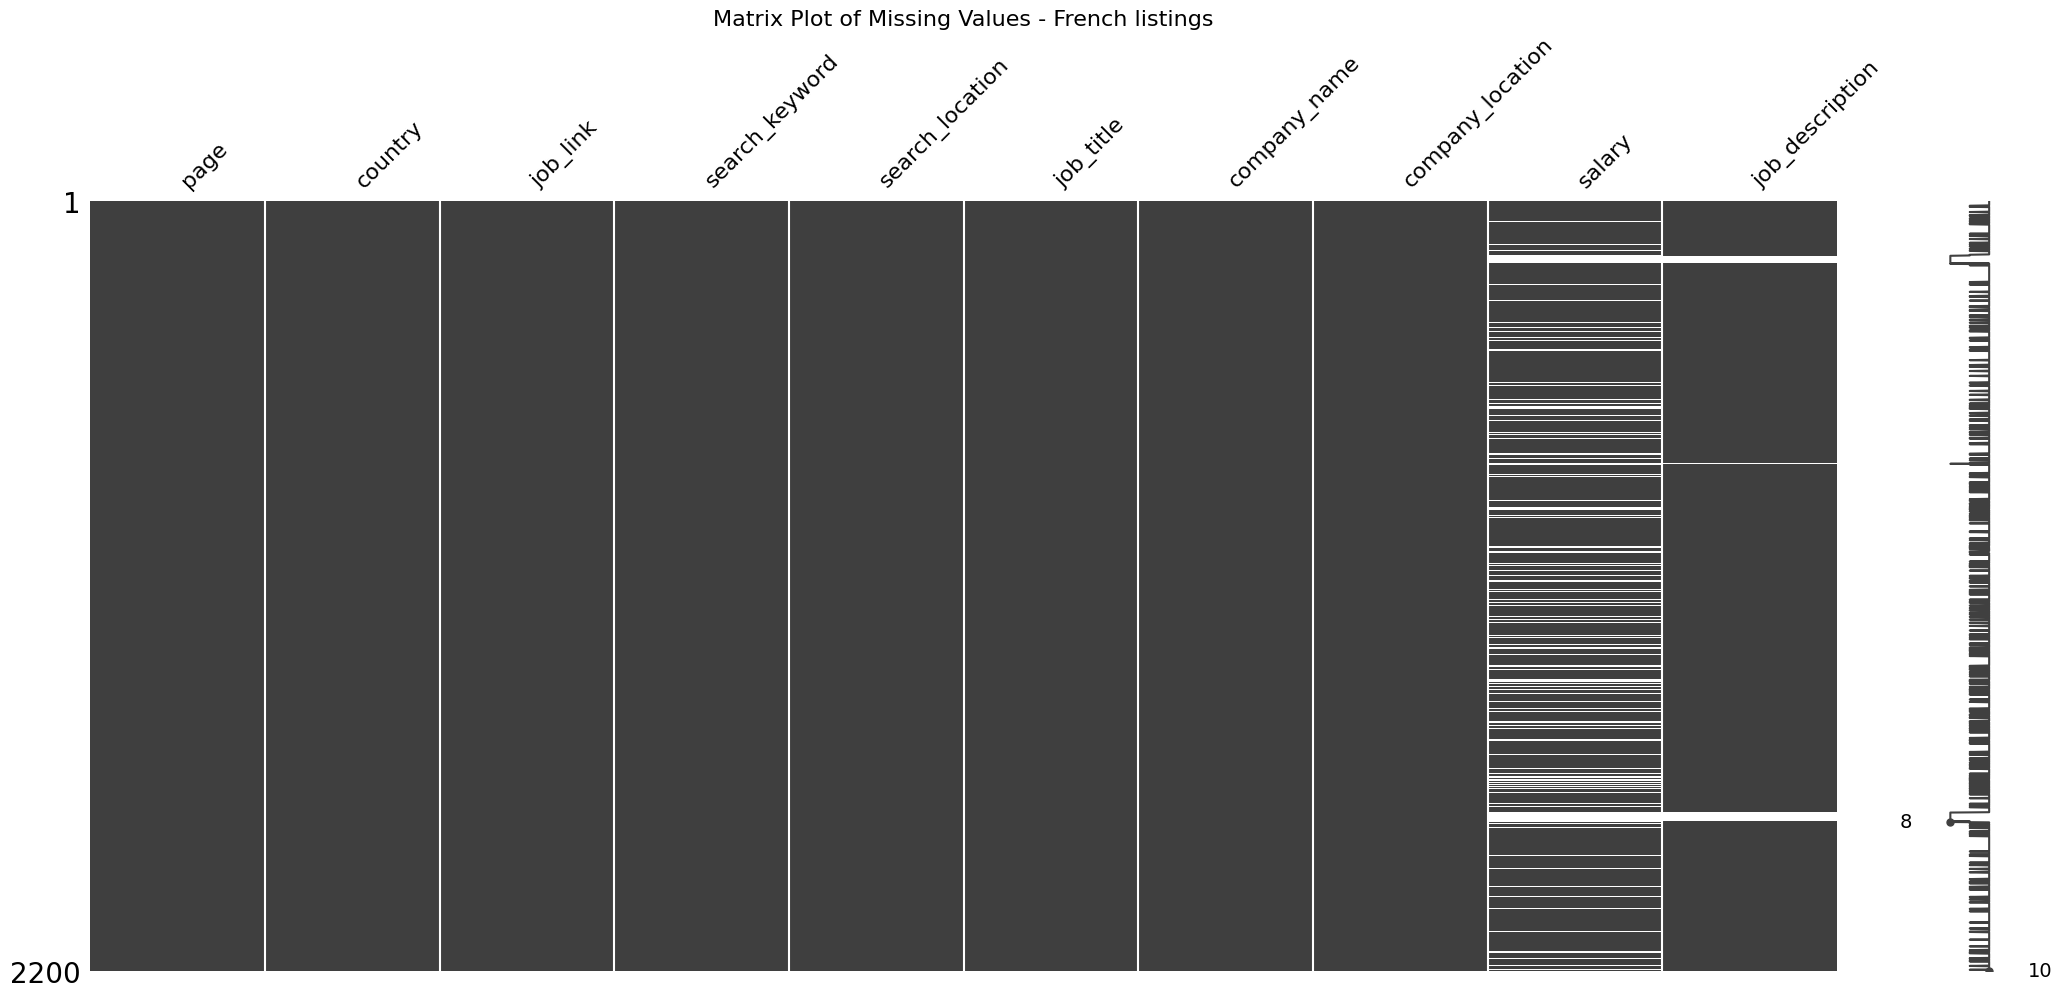

In [15]:
# Visualize missing data patterns 
msno.matrix(dfs['France']) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16) 
plt.show()

In [16]:
# Look into the missing descriptions for French job listings (scraper requests seems to have been blocked here?)
print(dfs['France'].isnull().sum())
#dfs['France'][dfs['France']['job_description'].isnull()].head()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [17]:
# Manual import of missing job description data retrieved directly from URLs 
df_FRA_missing = pd.read_csv(MISSING)
df_FRA_missing.head(3)

page country                                           job_link  \
0    11  France  https://www.indeed.fr/rc/clk?jk=cce878d76d9b30...   
1    11  France  https://www.indeed.fr/rc/clk?jk=56a9127952012f...   
2    11  France  https://www.indeed.fr/rc/clk?jk=f43bcf87ea7bcd...   

  search_keyword search_location                                  job_title  \
0   Data+Analyst      Paris (75)     Business Analyst Customer Data 360 H/F   
1   Data+Analyst      Paris (75)                Senior Data Analyst - Paris   
2   Data+Analyst      Paris (75)  Marketing Business Analyst - (CDD 6 mois)   

     company_name       company_location salary  \
0  AIR FRANCE KLM  Roissy-en-France (95)    CDI   
1         Aircall             Paris (75)    NaN   
2       Deliveroo             Paris (75)    NaN   

                                 job_description_new  
0  Air France KLM recrute :\n\nVous rejoignez l'é...  
1  Paris\nG&A – 13008 - Data /\nFull Time /\nHybr...  
2  Why Deliveroo\n\nOur mission is to transform t...

In [18]:
# Merge French data frames based on the 'job_link' column (serves as unique identifier)
merged_df = pd.merge(dfs['France'], df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
merged_df['job_description'] = merged_df['job_description'].fillna(merged_df['job_description_new'])
merged_df.drop(columns='job_description_new', inplace=True)
dfs['France'] = merged_df
# Verify that there are no missing values in 'job_description'
print(dfs['France'].isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


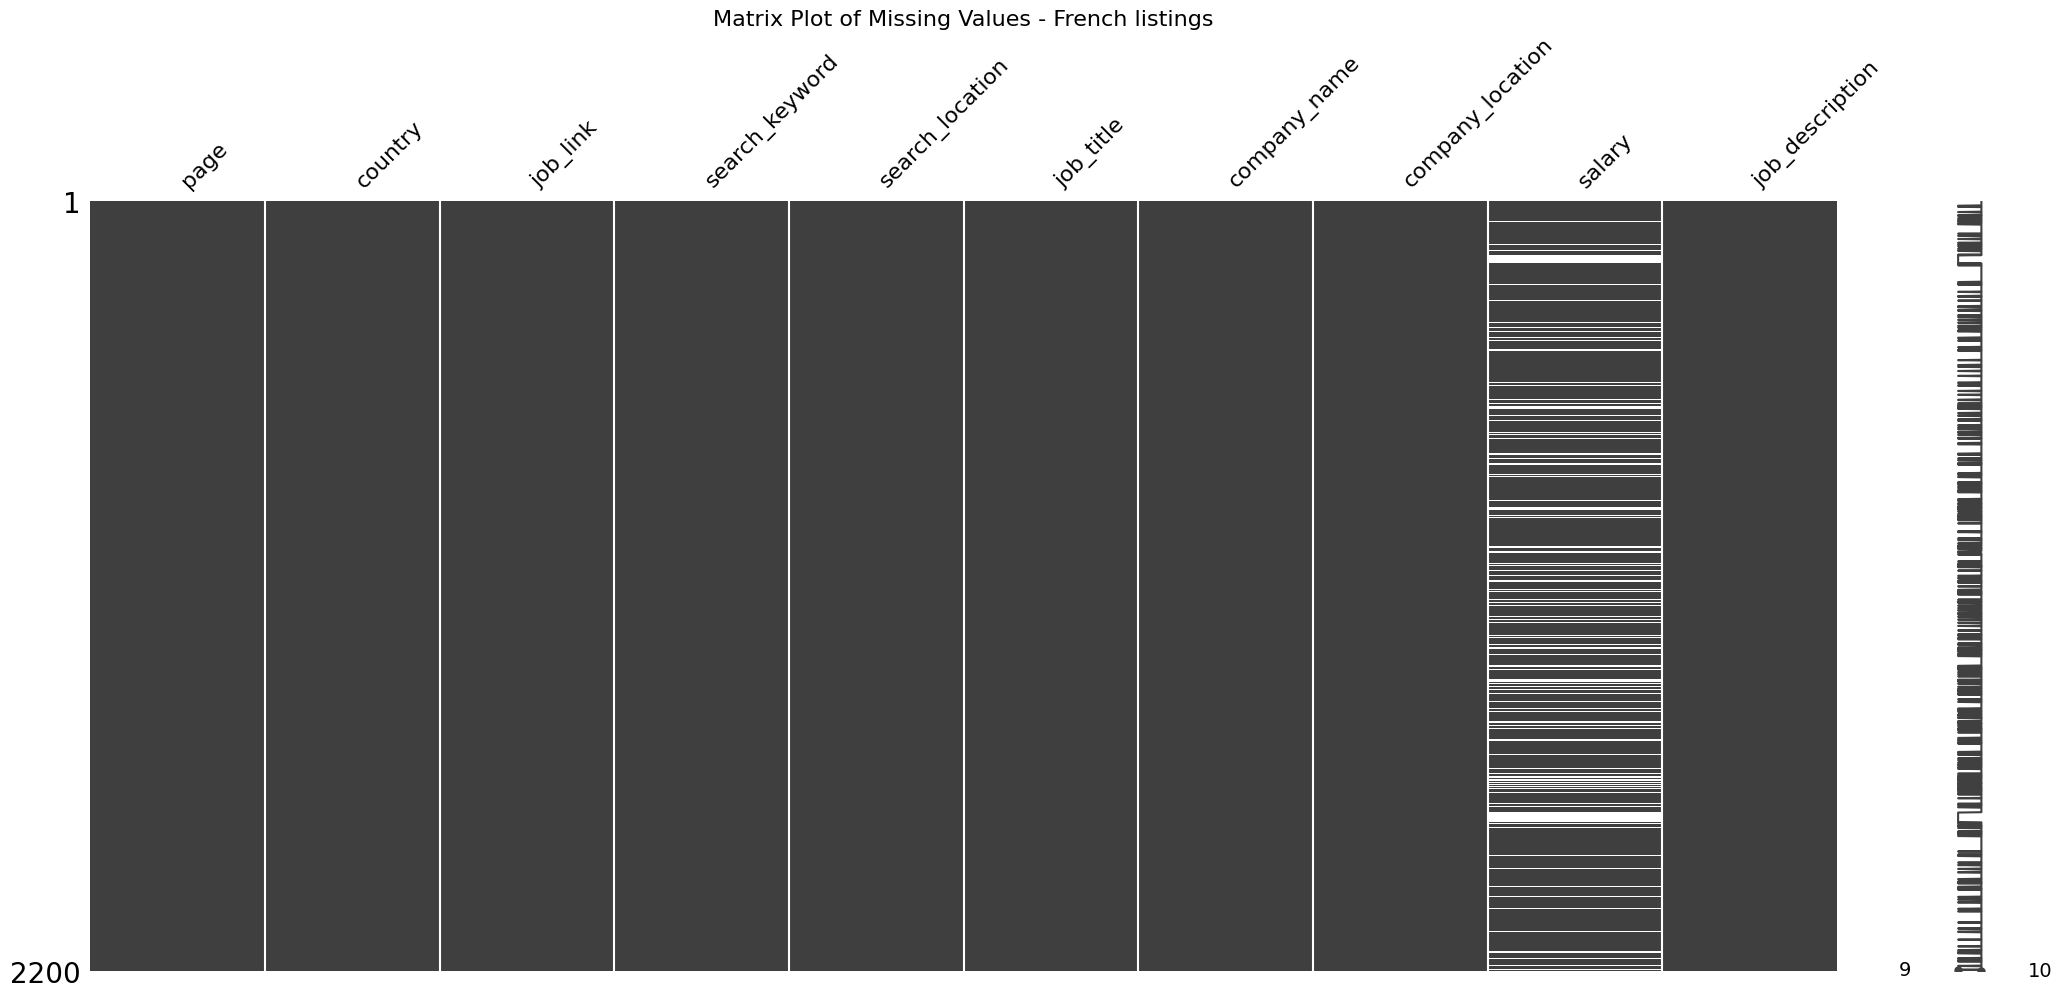

In [19]:
# Now the job_description should not have missing values anymore
msno.matrix(dfs['France'])
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [20]:
# Verify consistent data types after the newly added info in job_description column
dfs['France'] = dfs['France'].astype(DTYPE_DICT)
dfs['France'].dtypes

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object

### Check for duplicates

In [21]:
{mf.check_duplicates(df) for _, df in dfs.items()}

DataFrame with 320 rows has 0 duplicates.
DataFrame with 2200 rows has 0 duplicates.
DataFrame with 769 rows has 0 duplicates.
DataFrame with 1317 rows has 0 duplicates.


{None}

No rows are completely identical, but there are numerous examples of completely identical job descriptions. These are likely _reposts_ (the same job appearing multiple times, just with different unique links). We will remove rows where the job descriptions are identical if there is alsoan identical location and company name (or same urls), but first we have to normalize the job description (see below). 

### Clean columns

In [22]:
# Clean search_keyword and search_location columns: replace '+' with ' ' 
dfs = {country: df.assign(
   search_keyword=pd.Categorical(df['search_keyword'].astype(str).str.replace('+', ' ')),
   search_location=pd.Categorical(df['search_location'].astype(str).str.replace('+', ' '))
) for country, df in dfs.items()}
# Verify that it worked 
dfs['Sweden'].head(3)

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  Data Analyst (Data Visualization)   
1   Data Analyst       Stockholm                       Data Analyst   
2   Data Analyst       Stockholm                       Data Analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) 
 
 Swedium ...  
1  Role: 
 
 Website Performance: Web analyst foc...  
2  Responsibilities 
 
 Website Performance:  Web...

In [23]:
# Clean job_title column 
dfs = {country: df.assign(
   job_title=df['job_title'].str.lower().pipe(
       lambda x: x.str.replace(r'\(?(h/f|f/h)\)?', '', regex=True).str.strip() 
       if country == 'France' else x
   )
) for country, df in dfs.items()}

In [24]:
# Merge all dfs in the dictionary into a single df
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
# Add dates when data was scraped 
df_combined['date'] = np.where(df_combined['country'].isin(['Sweden', 'USA']), pd.to_datetime('2024-09-19'), pd.to_datetime('2024-09-20'))
df_combined.head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title             company_name  \
0                  data analyst (data visualization)  Swedium Global Services   
1                                       data analyst               Deploja AB   
2                                       data analyst      Cubane Solutions AB   
3                                       data analyst                     Sobi   
4  juniora analysts till operations, engineering,...                 Deloitte   

           company_location  salary  \
0  Distansjobb in Stockholm     NaN   
1              169 73 Solna     NaN   
2                 Stockholm  Heltid   
3                 Stockholm  Heltid   
4          113 57 Stockholm  Heltid   

                                     job_description       date  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19  
3  Company Description 
  Statistics show that wo... 2024-09-19  
4  Företagsbeskrivning  
 
 
 Deloitte är en glob... 2024-09-19

In [25]:
# Language identification for job descriptions (can take a little while)
df_combined['language'] = df_combined['job_description'].map(tf.detect_language)

In [26]:
# Assign job_id to each row, instead of using URLs as unique identifiers
df_combined.insert(0, 'job_id', range(1, len(df_combined) + 1))
df_combined.head(3)

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1       2     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  data analyst (data visualization)   
1   Data Analyst       Stockholm                       data analyst   
2   Data Analyst       Stockholm                       data analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description       date language  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19       en  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19       en  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19       en

In [27]:
# Normalize text data in job_description
normalized_descriptions = df_combined.groupby('language')[['job_description']].apply(tf.normalize_group)
normalized_descriptions = normalized_descriptions.reset_index()
df_combined = df_combined.reset_index(drop=True)
df_combined = pd.merge(df_combined, normalized_descriptions[['language', 'job_description', 'job_description_norm']], on=['language', 'job_description'], how='left')

Normalizing text for language group: en
Normalizing text for language group: fr
Normalizing text for language group: it
Normalizing text for language group: sv


In [28]:
df_combined[['job_description', 'job_description_norm']].head()

job_description  \
0  Data Analyst (Data Visualization) 
 
 Swedium ...   
1  Data Analyst (Data Visualization) 
 
 Swedium ...   
2  Role: 
 
 Website Performance: Web analyst foc...   
3  Role: 
 
 Website Performance: Web analyst foc...   
4  Responsibilities 
 
 Website Performance:  Web...   

                                job_description_norm  
0  data analyst data visualization swedium global...  
1  data analyst data visualization swedium global...  
2  role website performance web analyst focus spe...  
3  role website performance web analyst focus spe...  
4  responsibility website performance web analyst...

In [29]:
# Now remove duplicates based on normalized job description. 
# Identify rows with same job description, company, and location (or unique url) and keep only the latest job listing
df_combined = mf.remove_duplicates_jobdesc(df_combined)

Initial rows: 10084
Rows after removing exact duplicates: 3032
Final rows: 3032
Total duplicates removed: 7052


In [30]:
# Check new row numbers after removing duplicates
row_counts = df_combined.groupby('country').size()
print("\nRow counts:\n", row_counts)


Row counts:
 country
France    1365
Italy      569
Sweden     263
USA        835
dtype: int64


In [31]:
# Map language codes to full language names 
df_combined['language'] = df_combined['language'].map(LANGUAGE_MAP)

In [32]:
df_combined.head(3)

job_id  page country                                           job_link  \
6        4     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
13       8     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
20      12     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

   search_keyword search_location  \
6    Data Analyst       Stockholm   
13   Data Analyst       Stockholm   
20   Data Analyst       Stockholm   

                                            job_title  \
6                                        data analyst   
13  fraud & data analyst to the fraud strategy & a...   
20                                       data analyst   

                 company_name                 company_location  salary  \
6                        Sobi                        Stockholm  Heltid   
13         Entercard Group AB                 111 39 Stockholm     NaN   
20  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                      job_description       date language  \
6   Company Description 
  Statistics show that wo... 2024-09-19  english   
13  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
20  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                 job_description_norm  
6   company description statistic show woman under...  
13  entercard entercard one scandinavia’s leading ...  
20  star stable entertainment upon time 2011 found...

In [33]:
# Clean and parse location column
countries = ['Sweden', 'France', 'Italy', 'USA']
location_dfs = [mf.standardize_locations(
    df_combined[df_combined['country']==country], 
    'company_location',
    country) 
    for country in countries]
location_df = pd.concat(location_dfs)
df_combined = df_combined.merge(location_df, on=['job_id', 'company_location'], how='left')
df_combined = df_combined.drop('country_x', axis=1).rename(columns={'country_y': 'country'})

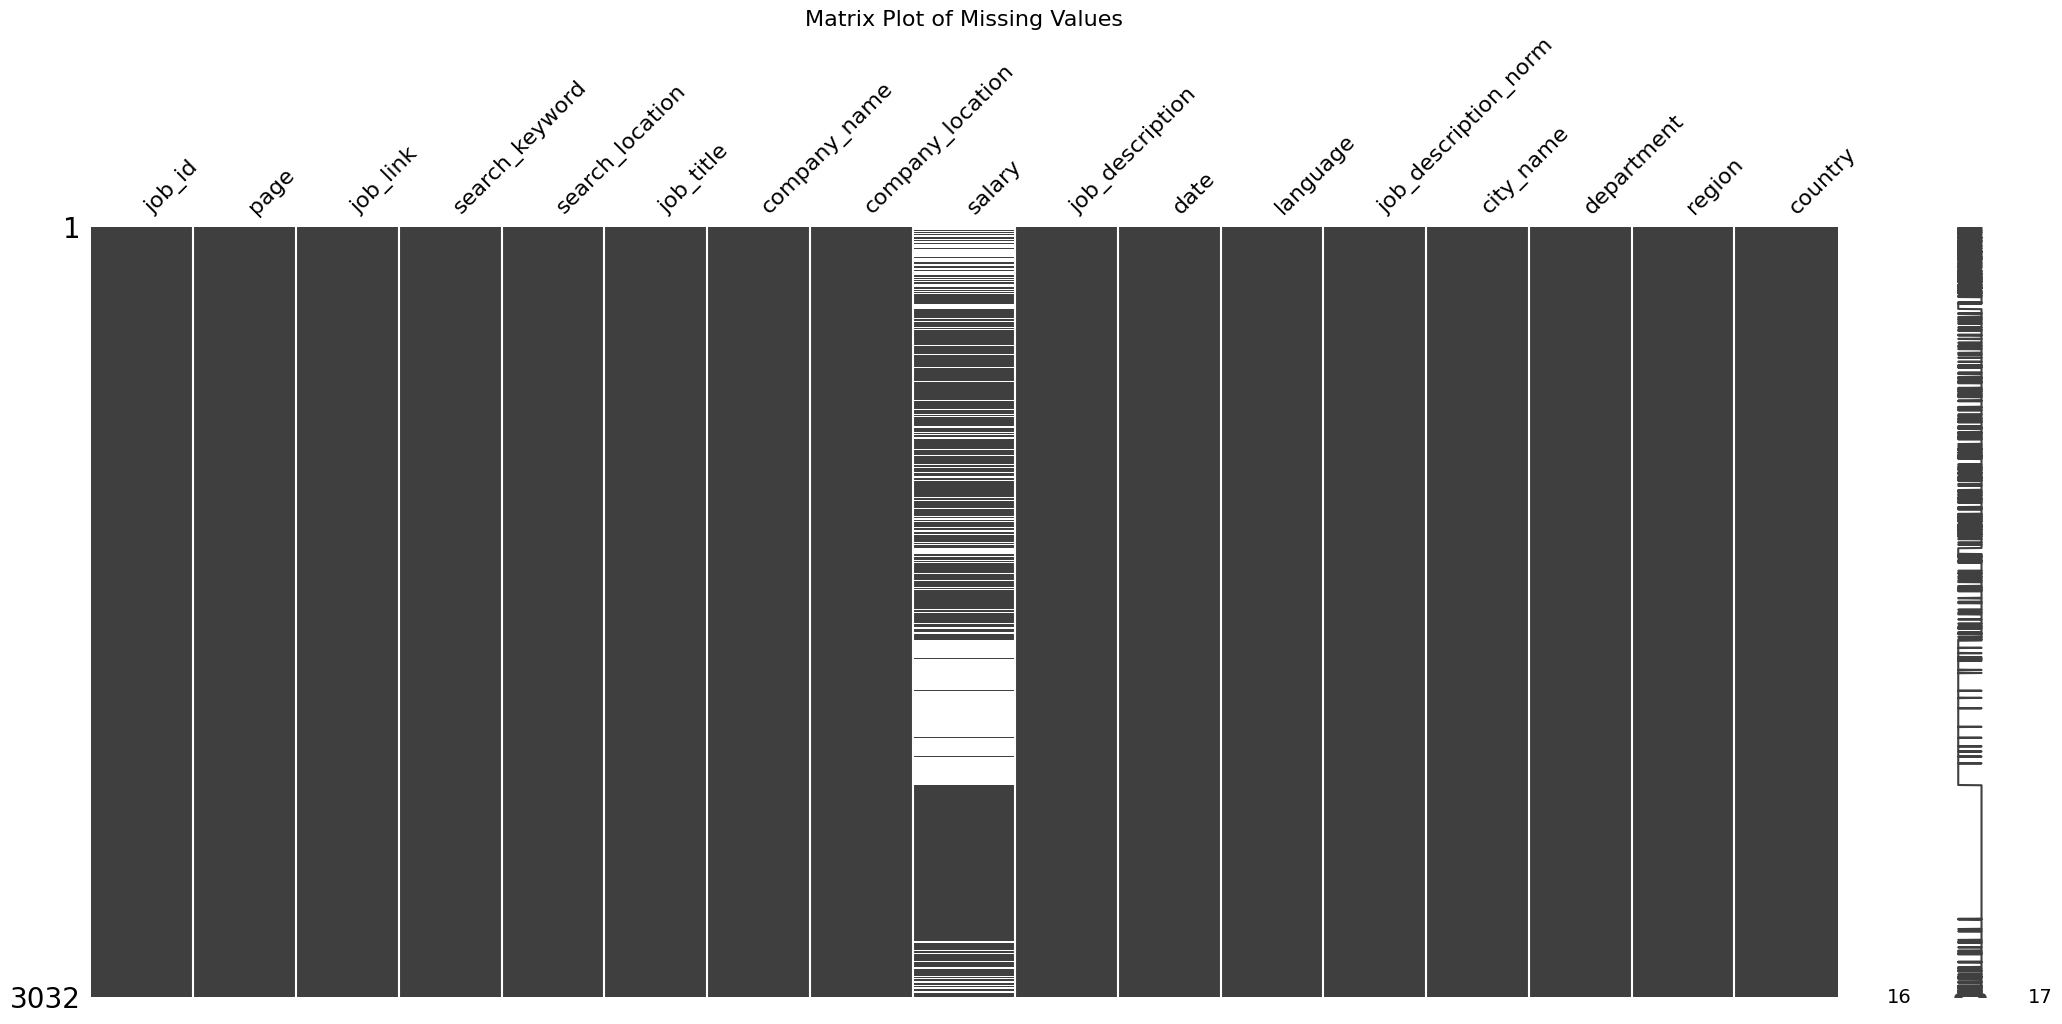

In [34]:
# Just verify that this didn't introduce new null values
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values', fontsize=16)  
plt.show()

In [35]:
# Verify data types for new columns (compare with DTYPE_DICT)
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
city_name                       object
department                      object
region                          object
country                         object
dtype: object

In [36]:
df_combined = df_combined.astype({
    'language': 'category',
    'job_description_norm': 'string',
    'city_name' : 'string',  
    'country' : 'category' 
})
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
dtype: object

In [37]:
df_combined.head(3)

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden

## Descriptive statistics

In [38]:
# Describe (numerical) columns  
mask = df_combined['country'] == 'Sweden'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    263.0  263.0                                                263   
unique     NaN    NaN                                                263   
top        NaN    NaN  https://se.indeed.com/rc/clk?jk=132e951bba6ac1...   
freq       NaN    NaN                                                  1   

        search_keyword search_location         job_title         company_name  \
count              263             263               263                  263   
unique               4               3               194                  198   
top     Data Scientist       Stockholm  systemutvecklare  Cubane Solutions AB   
freq               131             186                19                    7   

       company_location  salary  \
count               263     113   
unique               88      10   
top           Stockholm  Heltid   
freq                 69      58   

                                          job_description date language  \
count                                                 263  263      263   
unique                                                263  NaN        2   
top     We are hiring a GIS Analyst   Nordregio is exp...  NaN  english   
freq                                                    1  NaN      133   

                                     job_description_norm  city_name  \
count                                                 263        263   
unique                                                263         15   
top     hiring gi analyst nordregio expanding gi team ...  Stockholm   
freq                                                    1        157   

                department     region country  
count                  263        263     263  
unique                   3          3       1  
top     01 - Stockholm län  Stockholm  Sweden  
freq                   186        186     263

In [39]:
# Describe categorical columns  
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
systemutvecklare                                 19
data analyst                                     13
data scientist                                   13
business analyst                                  8
senior data scientist                             5
                                                 ..
pricing coordinator                               1
senior business intelligence analyst              1
senior logistics analyst                          1
powerbi utvecklare                                1
production analytics lead [game intelligence]     1
Name: count, Length: 194, dtype: Int64

Value counts for column: company_name
company_name
Cubane Solutions AB      7
Deploja AB               6
JobBusters AB            4
Volvo Group              4
TEN10 AB                 4
                        ..
Techster Solutions       1
JAS Worldwide            1
Wolters Kluwer           1
Techster Solutions AB    1
Ubisoft               

### Preliminary observations, Swedish job listings:
- __Most frequent job title__: Systemutvecklare.
- __Most frequent company__: Cubane Solutions AB. 
- __Company location__: Stockholm primarily. 
- __Salary ranges__: Few numerical values.

In [40]:
mask = df_combined['country'] == 'France'
df_combined[mask].describe(include='all').head(4)

job_id    page                                           job_link  \
count   1365.0  1365.0                                               1365   
unique     NaN     NaN                                               1365   
top        NaN     NaN  https://www.indeed.fr/rc/clk?jk=87348216f5b0a7...   
freq       NaN     NaN                                                  1   

         search_keyword search_location     job_title company_name  \
count              1365            1365          1365         1365   
unique                4               3          1151          718   
top     Product Analyst      Paris (75)  data analyst          AXA   
freq                501            1200            39           39   

       company_location       salary  \
count              1365         1109   
unique              256          164   
top          Paris (75)  Temps plein   
freq                380          299   

                                          job_description  date language  \
count                                                1365  1365     1365   
unique                                               1350   NaN        2   
top     The Sandbox is a user-generated content virtua...   NaN   french   
freq                                                    2   NaN      981   

                                     job_description_norm city_name  \
count                                                1365      1365   
unique                                               1343        95   
top     entité lagardère travel retail duty free globa...     Paris   
freq                                                    2       689   

        department         region country  
count         1365           1365    1365  
unique          10              3       1  
top     75 - Paris  Île-de-France  France  
freq           692           1201    1365

In [41]:
af.desc_categorical(df_combined[mask]) 

Value counts for column: job_title
job_title
data analyst                                                                                            39
data scientist                                                                                          32
business analyst                                                                                        13
data analyst intern                                                                                      8
business analyst data                                                                                    7
                                                                                                        ..
apprenticeship - business data analyst - september 2024 - (m/f)                                          1
alternance - assistant data analyst                                                                      1
business analyst customer data 360 & crm                                                           

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job title__: Data Analyst. 
- __Most frequently mentioned company__: AXA. 
- __Company location__: Most in Paris. 
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [42]:
mask = df_combined['country'] == 'Italy'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    569.0  569.0                                                569   
unique     NaN    NaN                                                569   
top        NaN    NaN  https://it.indeed.com/rc/clk?jk=46de7544ab716b...   
freq       NaN    NaN                                                  1   

       search_keyword    search_location       job_title  \
count             569                569             569   
unique              4                  3             451   
top      Data Analyst  Milano, Lombardia  data scientist   
freq              262                390              33   

                               company_name   company_location  \
count                                   569                569   
unique                                  309                 96   
top     BIP - Business Integration Partners  Milano, Lombardia   
freq                                     30                148   

                 salary                                    job_description  \
count                17                                                569   
unique               14                                                552   
top     1.000 € al mese  NTT DATA, Trusted Global Innovator, è tra i pr...   
freq                  3                                                  3   

       date language                               job_description_norm  \
count   569      569                                                569   
unique  NaN        3                                                555   
top     NaN  italian  ntt data trusted global innovator è tra princi...   
freq    NaN      313                                                  3   

       city_name   department     region country  
count        569          569        569     569  
unique        27            6          3       1  
top       Milano  MI - Milano  Lombardia   Italy  
freq         343          382        390     569

In [43]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data scientist                      33
data analyst                        16
business analyst                    11
senior data analyst                  6
data engineer                        4
                                    ..
senior business analyst              1
data scientist middle                1
bi engineer                          1
junior business analyst autohero     1
analista programmatore cobol         1
Name: count, Length: 451, dtype: Int64

Value counts for column: company_name
company_name
BIP - Business Integration Partners    30
NTT Data                               16
KPMG                                   15
DXC Technology                         11
Euronext                               10
                                       ..
Rosetti Marino spa                      1
EF Solare Italia                        1
Advancia                                1
Scrambled Eggs Technology Solutions     1
adecco         

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job title__: Data Scientist.
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. 
- __Salary ranges__: Few numerical entries. 

In [44]:
mask = df_combined['country']=='USA'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    835.0  835.0                                                835   
unique     NaN    NaN                                                835   
top        NaN    NaN  https://www.indeed.com/rc/clk?jk=274ddb9b95715...   
freq       NaN    NaN                                                  1   

        search_keyword search_location     job_title company_name  \
count              835             835           835          835   
unique               4               3           737          470   
top     Data Scientist    New York, NY  data analyst         Citi   
freq               264             487            12           27   

       company_location     salary  \
count               835        789   
unique              185        524   
top        New York, NY  Full-time   
freq                179        149   

                                          job_description date language  \
count                                                 835  835      835   
unique                                                823  NaN        1   
top     Wavemaker positively provokes growth for clien...  NaN  english   
freq                                                    2  NaN      835   

                                     job_description_norm city_name  \
count                                                 835       835   
unique                                                823        42   
top     wavemaker positively provokes growth client re...  New York   
freq                                                    2       419   

                 department     region country  
count                   835        835     835  
unique                    5          3       1  
top     NY - New York State  Northeast     USA  
freq                    450        487     835

In [45]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data analyst                                                   12
business analyst                                               11
senior machine learning engineer                                9
senior data scientist                                           8
senior business analyst                                         5
                                                               ..
sales analyst                                                   1
healthcare claims api/edi business analyst (local) (hybrid)     1
ecommerce analyst                                               1
senior financial analyst, north america commercial finance      1
business analyst, performance internal controls                 1
Name: count, Length: 737, dtype: Int64

Value counts for column: company_name
company_name
Citi                        27
JPMorganChase               22
Google                      13
Amazon.com Services LLC     11
PRICE WATERHOU

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job title__: Data Analyst. But titles need to be looked at in detail to get the full picture (there are terms such as 'senior' that will result in separate categories when counting values)
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to look into the numerical entries only.

## Feature engineering 

### Retrieve numeric values for salary

In [46]:
df_combined.head()

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3      14     1  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4      16     2  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   
3  baby journey lanserades hösten 2020 app riktar...  Stockholm   
4  wsp global consulting firm assisting public pr...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden  
3  01 - Stockholm län  Stockholm  Sweden  
4  01 - Stockholm län  Stockholm  Sweden

In [47]:
# Use like this:
df_combined = sf.update_salary_data(df_combined)

******************************
Retrieving salaries for Sweden:
Languages: ['english', 'swedish']
     min_salary  max_salary currency
110     40000.0     80000.0      sek
221     15000.0     20000.0      sek
Rows changed for Sweden: 263. Original rows retrieved: 263
******************************

******************************
Retrieving salaries for France:
Languages: ['french', 'english']
      min_salary  max_salary currency
265        721.0      1747.0     euro
286     38452.41     50000.0     euro
291        800.0      1500.0     euro
295      45000.0     55000.0     euro
297      33000.0     33000.0     euro
...          ...         ...      ...
1606     35000.0     35000.0     euro
1608     35000.0     45000.0     euro
1617     42000.0     48000.0     euro
1619     45000.0     55000.0     euro
1620     40000.0     55000.0     euro

[155 rows x 3 columns]
Rows changed for France: 1365. Original rows retrieved: 1365
******************************

******************************
R

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_id                3032 non-null   int64         
 1   page                  3032 non-null   int64         
 2   job_link              3032 non-null   object        
 3   search_keyword        3032 non-null   category      
 4   search_location       3032 non-null   object        
 5   job_title             3032 non-null   string        
 6   company_name          3032 non-null   string        
 7   company_location      3032 non-null   object        
 8   salary                2028 non-null   object        
 9   job_description       3032 non-null   string        
 10  date                  3032 non-null   datetime64[ns]
 11  language              3032 non-null   category      
 12  job_description_norm  3032 non-null   string        
 13  city_name         

In [49]:
print('Sample of updated data:')
print(df_combined[df_combined['salary'].notna()][['country', 'salary', 'min_salary', 'max_salary', 'currency', 'time_unit']].sample(5))

Sample of updated data:
     country            salary  min_salary  max_salary currency time_unit
880   France       Temps plein        <NA>        <NA>     <NA>      <NA>
160   Sweden            Heltid        <NA>        <NA>     <NA>      <NA>
499   France  CDI, Temps plein        <NA>        <NA>     <NA>      <NA>
391   France             Stage        <NA>        <NA>     <NA>      <NA>
1136  France  CDI, Temps plein        <NA>        <NA>     <NA>      <NA>


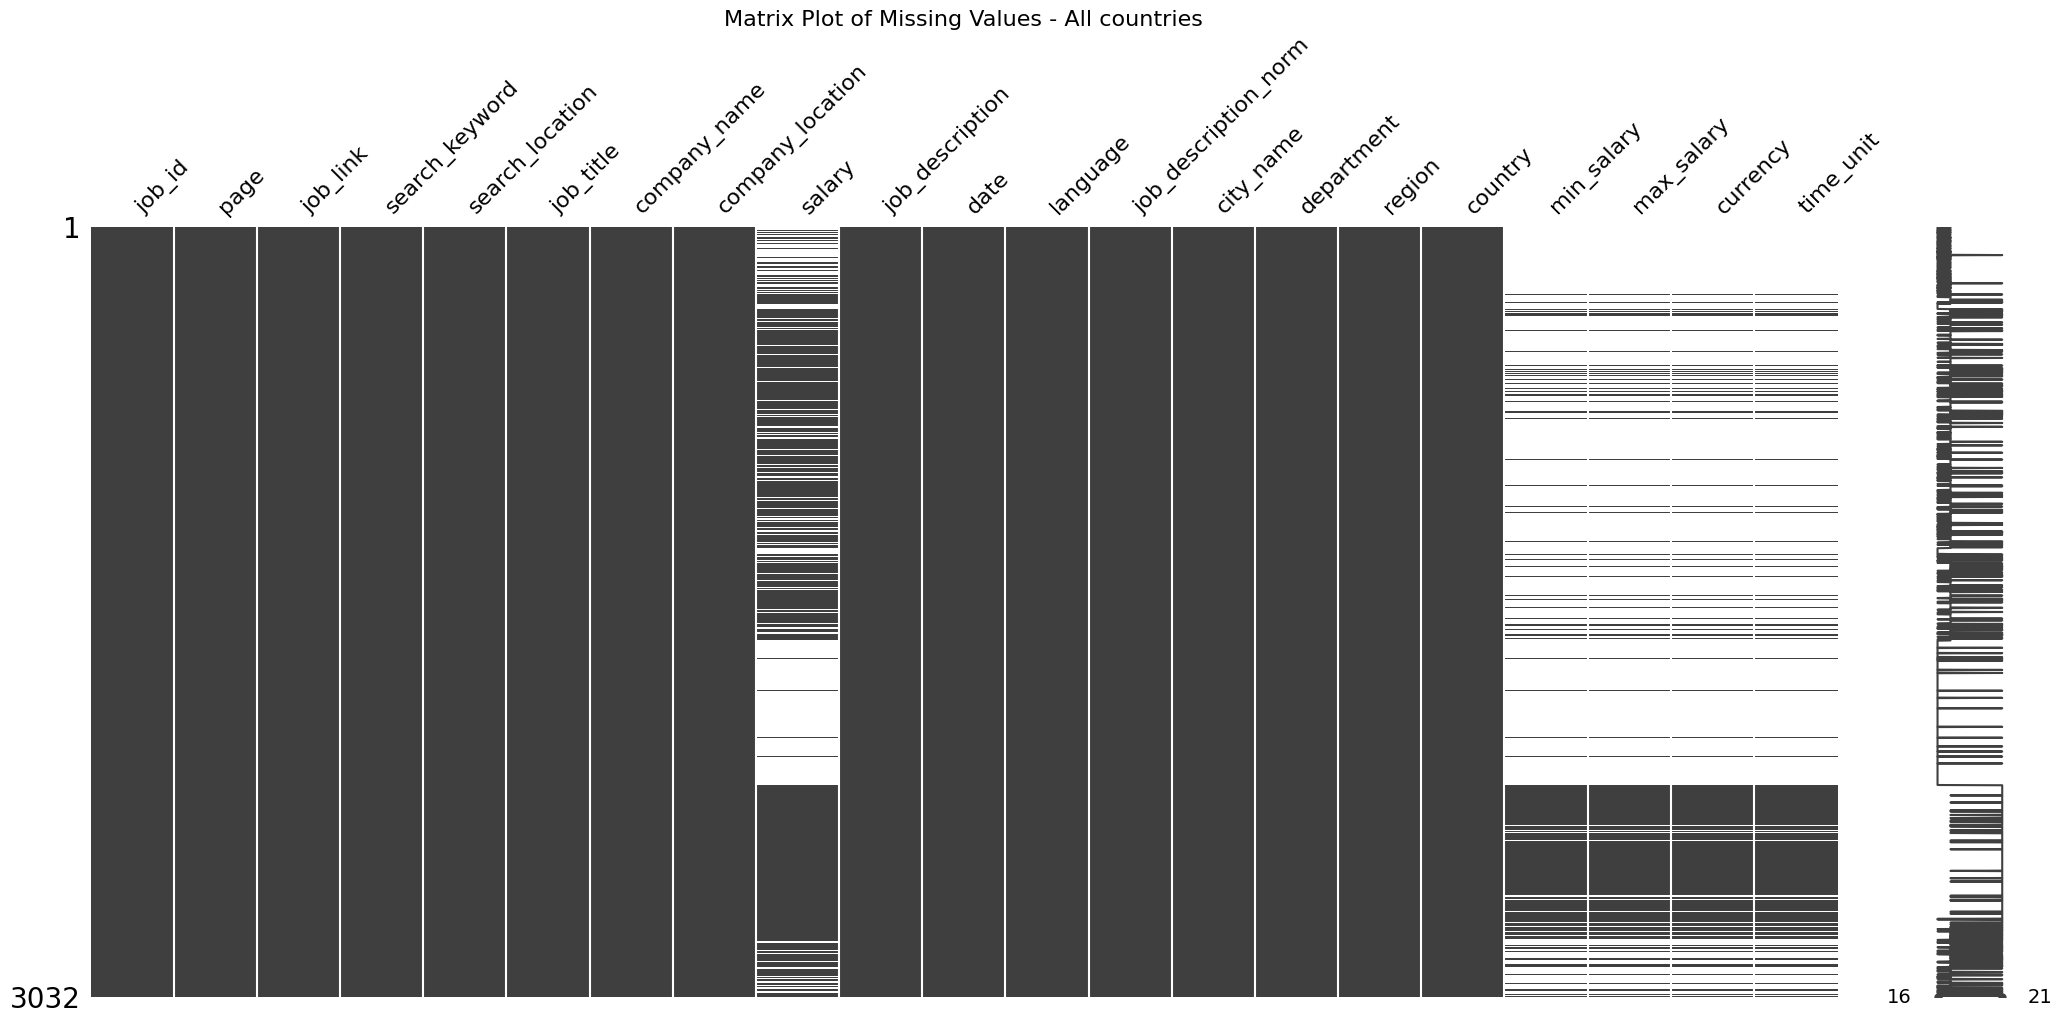

In [50]:
# Check missing values now 
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values - All countries', fontsize=16)  
plt.show()


Some salaries are disappearing when going into numeric mode, but that is just because they are not containing numerical values!

In [51]:
# Make sure data types are correct again
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                string[python]
time_unit               string[python]
dtype: object

In [52]:
# Get monthly salary for all rows 
df_combined['min_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'min_salary', 'time_unit')
df_combined['max_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'max_salary', 'time_unit')
df_combined[df_combined['min_salary_monthly'].notna()].head(3)

job_id  page                                           job_link  \
110     145     1  https://se.indeed.com/rc/clk?jk=044708271c5bec...   
221     279     1  https://se.indeed.com/rc/clk?jk=3daeeaf597909e...   
265     351     3  https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...   

      search_keyword search_location  \
110   Data Scientist        Göteborg   
221  Product Analyst           Malmö   
265     Data Analyst      Paris (75)   

                                             job_title  \
110  senior data scientist som vill skapa framtida ...   
221  swedish customer support analyst - bulgaria ba...   
265                alternance - assistant data analyst   

                   company_name                              company_location  \
110       Artificial Collective                               413 27 Göteborg   
221  TELUS International Europe                                          Lund   
265                  CMI France  Télétravail partiel à 92300 Levallois-Perret   

                                                salary  \
110                    40 000SEK - 80 000SEK per månad   
221  15 000SEK - 20 000SEK per månad  -   Tillsvida...   
265        De 721 € à 1 747 € par mois  -   Alternance   

                                       job_description  ...         city_name  \
110  Hej!  
 Är du redo att göra verklig skillnad m...  ...          Göteborg   
221  *Please note that the position is based in Sof...  ...              Lund   
265  CMI Media, la régie publicitaire du groupe CMI...  ...  Levallois-Perret   

                    department           region country min_salary max_salary  \
110  14 - Västra Götalands län  Västra Götaland  Sweden    40000.0    80000.0   
221             12 - Skåne län            Skåne  Sweden    15000.0    20000.0   
265        92 - Hauts-de-Seine    Île-de-France  France      721.0     1747.0   

    currency  time_unit  min_salary_monthly max_salary_monthly  
110      sek      month             40000.0            80000.0  
221      sek      month             15000.0            20000.0  
265     euro      month               721.0             1747.0  

[3 rows x 23 columns]

In [53]:
# Convert salary to same currency using exchange rate
df_combined = sf.process_salaries(df_combined)

Exchange rates: {'SEK': 0.08682, 'USD': 0.94679, 'EUR': 1}

Debug Information:
Currency mapping: {'dollar': 0.94679, 'euro': 1, 'sek': 0.08682}

Currency value counts: currency
<NA>      2233
dollar     625
euro       172
sek          2
Name: count, dtype: Int64

Sample conversions for each currency:

DOLLAR conversions:
     currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
2197   dollar            5647.595              6250.0           5347.08647   
2198   dollar              5000.0         9166.666667              4733.95   

     max_salary_month_EUR  
2197            5917.4375  
2198          8678.908333  

EURO conversions:
    currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
265     euro               721.0              1747.0                721.0   
286     euro           3204.3675         4166.666667            3204.3675   

    max_salary_month_EUR  
265               1747.0  
286          4166.666667  

SEK conversions:
    curr

In [54]:
# Verify correct data types 
# Convert currency, time_unit into categorical 
df_combined[['currency', 'time_unit']] = df_combined[['currency', 'time_unit']].astype('category')
df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']] = df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']].astype('Float64')
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                      category
time_unit                     category
min_salary_monthly             Float64
max_salary_monthly             Float64
min_salary_month_EUR           Float64
max_salary_month_EUR           Float64
dtype: object

### Detect keywords : overall

In [55]:
# Extract keywords for countries 
common_keywords = {country: tf.extract_keywords(df_combined, country) 
                  for country in ['Sweden', 'France', 'Italy', 'USA']}

Total rows: 3032
Rows for Sweden: 263
Sample cleaned descriptions: 0    company description statistic show woman under...
1    entercard entercard one scandinavia’s leading ...
2    star stable entertainment upon time 2011 found...
3    baby journey lanserades hösten 2020 app riktar...
4    wsp global consulting firm assisting public pr...
Name: job_description_norm, dtype: string
Total rows: 3032
Rows for France: 1365
Sample cleaned descriptions: 263    identifiant demande 31674 ville paris départem...
264    description poste intitulé poste data analyst ...
265    cmi medium régie publicitaire groupe cmi franc...
266    axa im act human progress investing matter act...
267    description l'entreprise équipes d’ubisoft com...
Name: job_description_norm, dtype: string
Total rows: 3032
Rows for Italy: 569
Sample cleaned descriptions: 1628    job location rome job description information ...
1629    azienda leader livello globale gestione inform...
1630    team entrerai far parte team ne

### Detect keywords : technical skills

In [56]:
technical_skills = pd.concat([
    af.count_keywords(df_combined, country, 'job_description_norm')
    for country in df_combined['country'].unique()
], ignore_index=True).sort_values('Count', ascending=False)

In [57]:
# Relative frequency of keyword for resp. country and search keyword
skills_country = af.calculate_country_frequencies(technical_skills, df_combined)

# View top skills for each country
top_skills_by_country = skills_country.sort_values(['Country', 'Frequency'], ascending=[True, False]).groupby('Country').head(10)
top_skills_by_country

Country                        Category      Keyword  Count  Total_jobs  \
80   France  Programming Languages/Software            r   1365        1365   
72   France  Programming Languages/Software           go    935        1365   
71   France  Programming Languages/Software        excel    715        1365   
90   France                 Version Control          git    574        1365   
85   France  Programming Languages/Software          sql    478        1365   
79   France  Programming Languages/Software       python    394        1365   
3    France                        BI Tools     power bi    319        1365   
7    France                        BI Tools      tableau    307        1365   
82   France  Programming Languages/Software         rust    113        1365   
20   France                 Cloud Computing        azure    110        1365   
167   Italy  Programming Languages/Software            r    569         569   
161   Italy  Programming Languages/Software           go    434         569   
160   Italy  Programming Languages/Software        excel    270         569   
176   Italy                 Version Control          git    243         569   
166   Italy  Programming Languages/Software       python    207         569   
172   Italy  Programming Languages/Software          sql    191         569   
135   Italy          Data Science Platforms  informatica    132         569   
171   Italy  Programming Languages/Software        scala     92         569   
97    Italy                        BI Tools     power bi     82         569   
101   Italy                        BI Tools      tableau     75         569   
235  Sweden  Programming Languages/Software            r    263         263   
228  Sweden  Programming Languages/Software           go    219         263   
244  Sweden                 Version Control          git    118         263   
239  Sweden  Programming Languages/Software          sql    104         263   
234  Sweden  Programming Languages/Software       python     79         263   
227  Sweden  Programming Languages/Software        excel     76         263   
229  Sweden  Programming Languages/Software         java     50         263   
197  Sweden                 Cloud Computing        azure     45         263   
182  Sweden                        BI Tools     power bi     38         263   
186  Sweden                        BI Tools      tableau     37         263   
326     USA  Programming Languages/Software            r    835         835   
319     USA  Programming Languages/Software           go    720         835   
318     USA  Programming Languages/Software        excel    537         835   
331     USA  Programming Languages/Software          sql    349         835   
325     USA  Programming Languages/Software       python    304         835   
336     USA                 Version Control          git    248         835   
330     USA  Programming Languages/Software        scala    196         835   
328     USA  Programming Languages/Software         rust    180         835   
256     USA                        BI Tools      tableau    156         835   
266     USA                 Cloud Computing          aws    110         835   

     Frequency  
80      100.00  
72       68.50  
71       52.38  
90       42.05  
85       35.02  
79       28.86  
3        23.37  
7        22.49  
82        8.28  
20        8.06  
167     100.00  
161      76.27  
160      47.45  
176      42.71  
166      36.38  
172      33.57  
135      23.20  
171      16.17  
97       14.41  
101      13.18  
235     100.00  
228      83.27  
244      44.87  
239      39.54  
234      30.04  
227      28.90  
229      19.01  
197      17.11  
182      14.45  
186      14.07  
326     100.00  
319      86.23  
318      64.31  
331      41.80  
325      36.41  
336      29.70  
330      23.47  
328      21.56  
256      18.68  
266      13.17

In [58]:
# Top 10 keywords overall
global_skills = af.calculate_global_frequencies(technical_skills, df_combined)
global_skills.head(10)

Category   Keyword  Count  Frequency  Total_jobs
94   Programming Languages/Software         r   3032     100.00        3032
86   Programming Languages/Software        go   2308      76.12        3032
85   Programming Languages/Software     excel   1598      52.70        3032
104                 Version Control       git   1183      39.02        3032
99   Programming Languages/Software       sql   1122      37.01        3032
93   Programming Languages/Software    python    984      32.45        3032
7                          BI Tools   tableau    575      18.96        3032
3                          BI Tools  power bi    539      17.78        3032
98   Programming Languages/Software     scala    396      13.06        3032
96   Programming Languages/Software      rust    389      12.83        3032

In [59]:
skills_by_role = af.calculate_frequencies_by_search_keyword(technical_skills, df_combined)

# Get top 10 skills for each search keyword
top_skills_by_role = skills_by_role.groupby('Search Keyword', observed=True).head(10)
top_skills_by_role

Search Keyword                        Category   Keyword  Count  \
67        BI Analyst  Programming Languages/Software         r    762   
60        BI Analyst  Programming Languages/Software        go    561   
59        BI Analyst  Programming Languages/Software     excel    461   
3         BI Analyst                        BI Tools  power bi    409   
71        BI Analyst  Programming Languages/Software       sql    377   
7         BI Analyst                        BI Tools   tableau    270   
75        BI Analyst                 Version Control       git    248   
66        BI Analyst  Programming Languages/Software    python    243   
17        BI Analyst                 Cloud Computing     azure     90   
68        BI Analyst  Programming Languages/Software      rust     87   
148     Data Analyst  Programming Languages/Software         r    805   
142     Data Analyst  Programming Languages/Software        go    591   
141     Data Analyst  Programming Languages/Software     excel    475   
158     Data Analyst                 Version Control       git    297   
153     Data Analyst  Programming Languages/Software       sql    249   
86      Data Analyst                        BI Tools   tableau    158   
147     Data Analyst  Programming Languages/Software    python    157   
84      Data Analyst                        BI Tools       sap     83   
150     Data Analyst  Programming Languages/Software      rust     81   
152     Data Analyst  Programming Languages/Software     scala     69   
242   Data Scientist  Programming Languages/Software         r    745   
235   Data Scientist  Programming Languages/Software        go    610   
241   Data Scientist  Programming Languages/Software    python    469   
247   Data Scientist  Programming Languages/Software       sql    330   
252   Data Scientist                 Version Control       git    325   
234   Data Scientist  Programming Languages/Software     excel    265   
246   Data Scientist  Programming Languages/Software     scala    161   
183   Data Scientist                 Cloud Computing       aws    154   
184   Data Scientist                 Cloud Computing     azure    141   
236   Data Scientist  Programming Languages/Software      java    136   
327  Product Analyst  Programming Languages/Software         r    720   
319  Product Analyst  Programming Languages/Software        go    546   
318  Product Analyst  Programming Languages/Software     excel    397   
337  Product Analyst                 Version Control       git    313   
332  Product Analyst  Programming Languages/Software       sql    166   
329  Product Analyst  Programming Languages/Software      rust    122   
326  Product Analyst  Programming Languages/Software    python    115   
331  Product Analyst  Programming Languages/Software     scala     82   
287  Product Analyst             Collaboration Tools      jira     73   
320  Product Analyst  Programming Languages/Software      java     47   

     Total_jobs  Frequency  
67          762     100.00  
60          762      73.62  
59          762      60.50  
3           762      53.67  
71          762      49.48  
7           762      35.43  
75          762      32.55  
66          762      31.89  
17          762      11.81  
68          762      11.42  
148         805     100.00  
142         805      73.42  
141         805      59.01  
158         805      36.89  
153         805      30.93  
86          805      19.63  
147         805      19.50  
84          805      10.31  
150         805      10.06  
152         805       8.57  
242         745     100.00  
235         745      81.88  
241         745      62.95  
247         745      44.30  
252         745      43.62  
234         745      35.57  
246         745      21.61  
183         745      20.67  
184         745      18.93  
236         745      18.26  
327         720     100.00  
319         720      75.83  
318         720      55.14  
337         720      43.47

### Detect keywords : interview process

In [60]:
CONTEXT_PATTERNS

{'english': 'recruitment process|interview process',
 'french': "processus de recrutement|processus d\\'entretien",
 'italian': 'processo di reclutamento|processo di colloquio',
 'swedish': 'rekryteringsprocess|intervjuprocess'}

In [61]:
# Extract interview information
interview_info_df, interview_flags_df = tf.extract_interview_details(df_combined, 
                                                                  'job_description_norm', 
                                                                  'language')

# Sum Boolean columns in interview_flags_df to count occurrences of each interview stage
stage_counts = interview_flags_df.select_dtypes(include='bool').sum()
stage_counts

phone_screening         49
technical_screening      8
case_study              16
coding_assessment        6
behavioral_interview     4
on_site_interview        3
presentation             0
dtype: int64

In [62]:
# Example: run this to retrieve text about technical interviews
#interview_info_df[interview_info_df['technical_screening_text'].notna()]

Information about the interview process seems to mostly be missing/left out from the job listnings. However, the most common category appears to be phone/video call screenings, followed by case studies. 

## Analysis and visualizations


### Categorical features

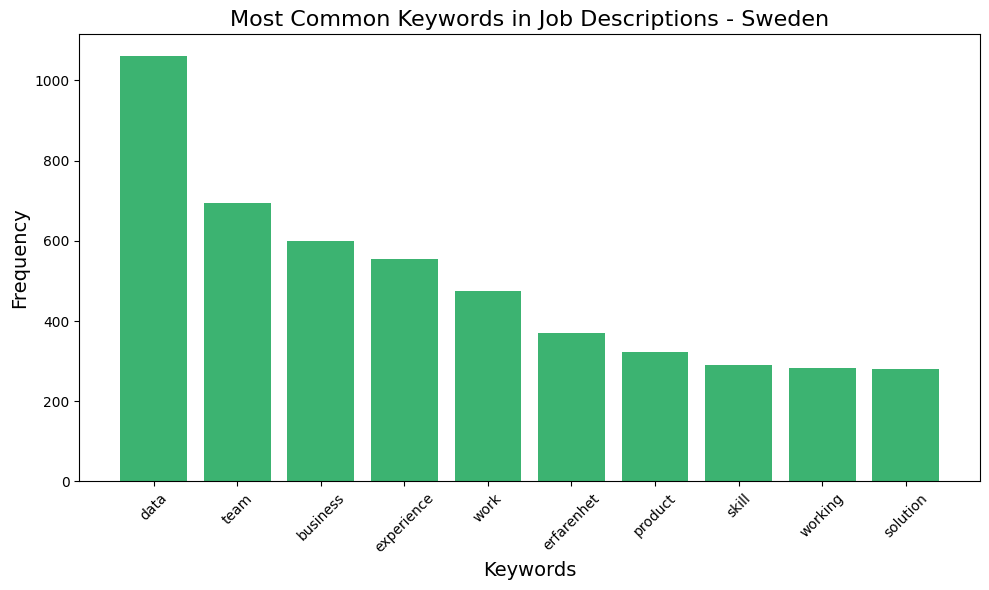

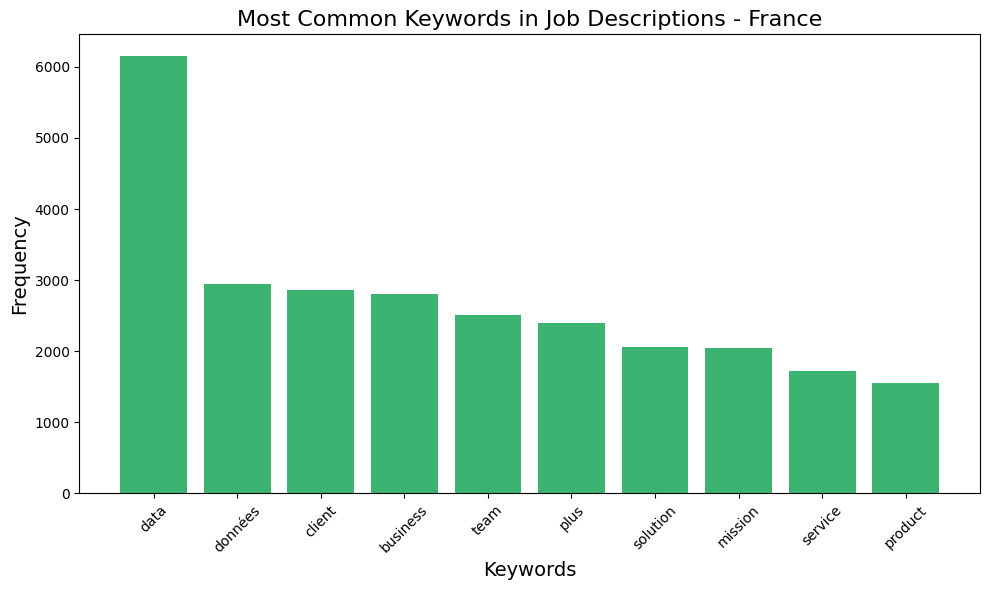

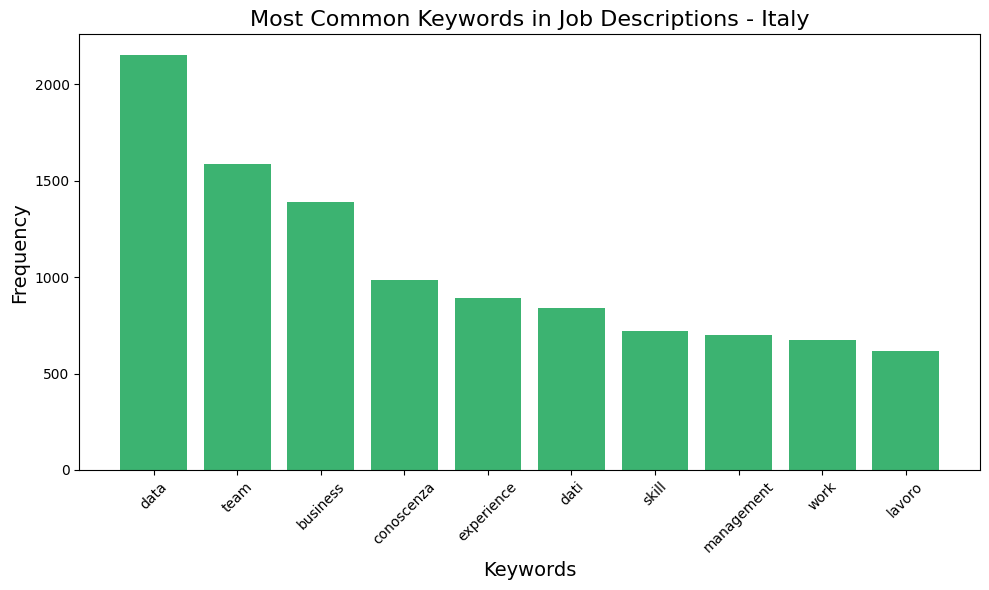

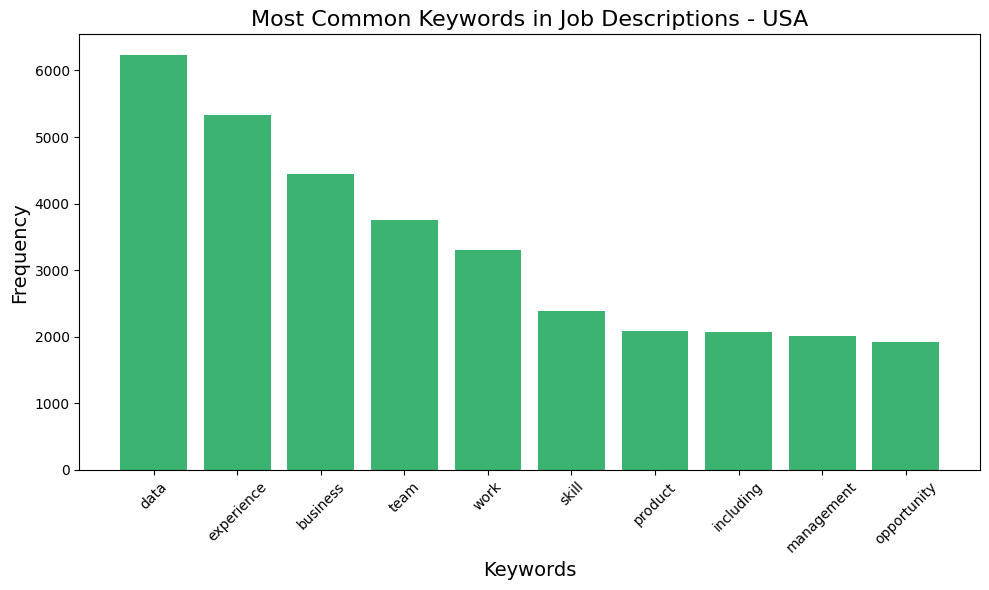

In [63]:
# Plot common keywords 
categorical_plots = {
    country_name: pf.plot_common_keywords(common_keywords[country_name][0], country_name)
    for code, (country_name, *_) in COUNTRIES_LANGUAGES.items()
}

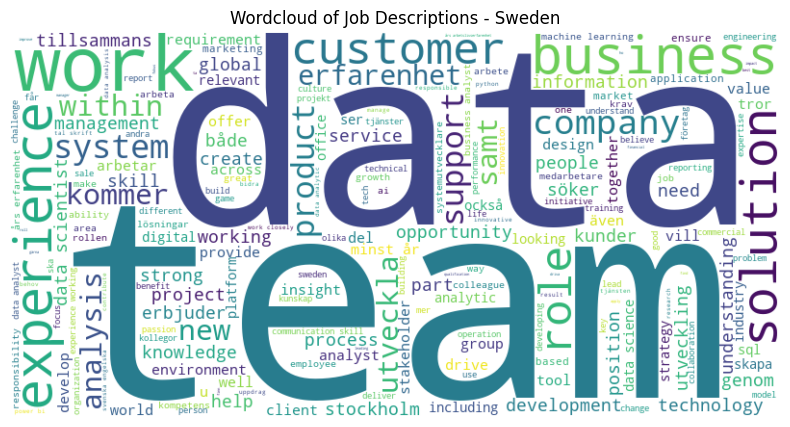

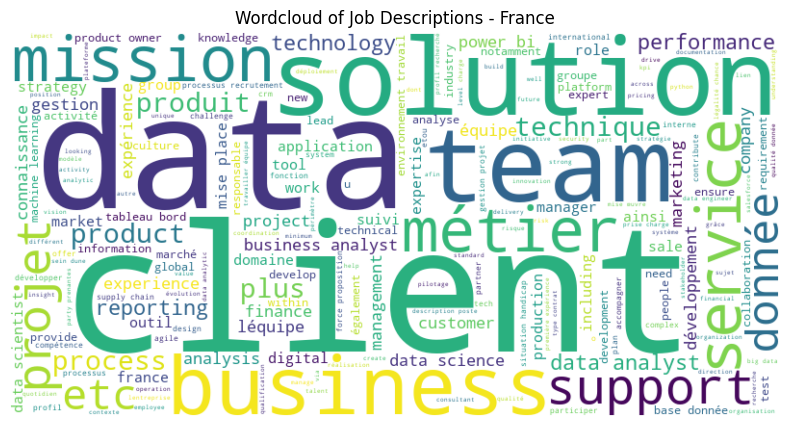

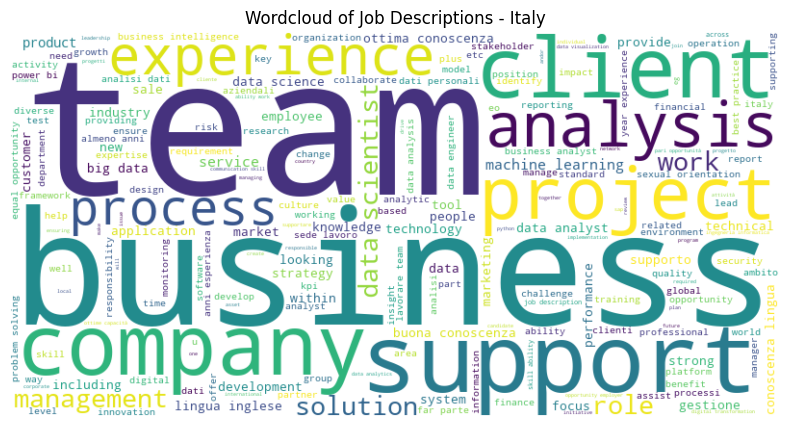

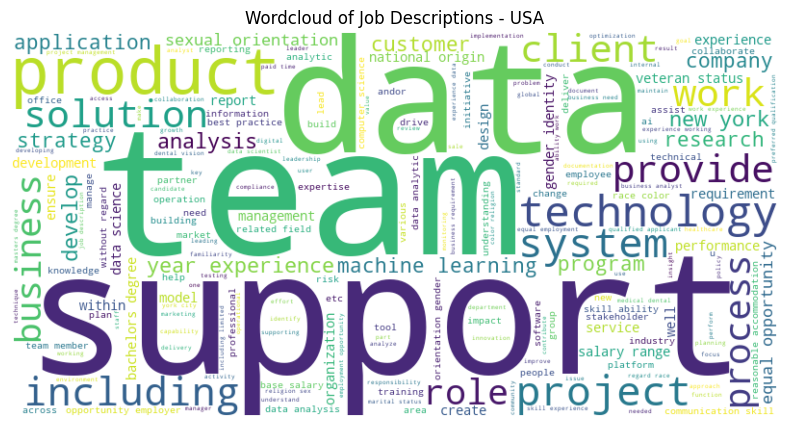

In [64]:
# Word cloud visualizations per country
for code, (country_name, *_) in COUNTRIES_LANGUAGES.items():
    pf.plot_wordtree(common_keywords[country_name][1], country_name)

In [65]:
technical_skills.head()

Category Keyword   Search Keyword Country  Count
391  Programming Languages/Software       r  Product Analyst  France    501
388  Programming Languages/Software       r       BI Analyst  France    372
367  Programming Languages/Software      go  Product Analyst  France    371
389  Programming Languages/Software       r     Data Analyst  France    292
363  Programming Languages/Software   excel  Product Analyst  France    279

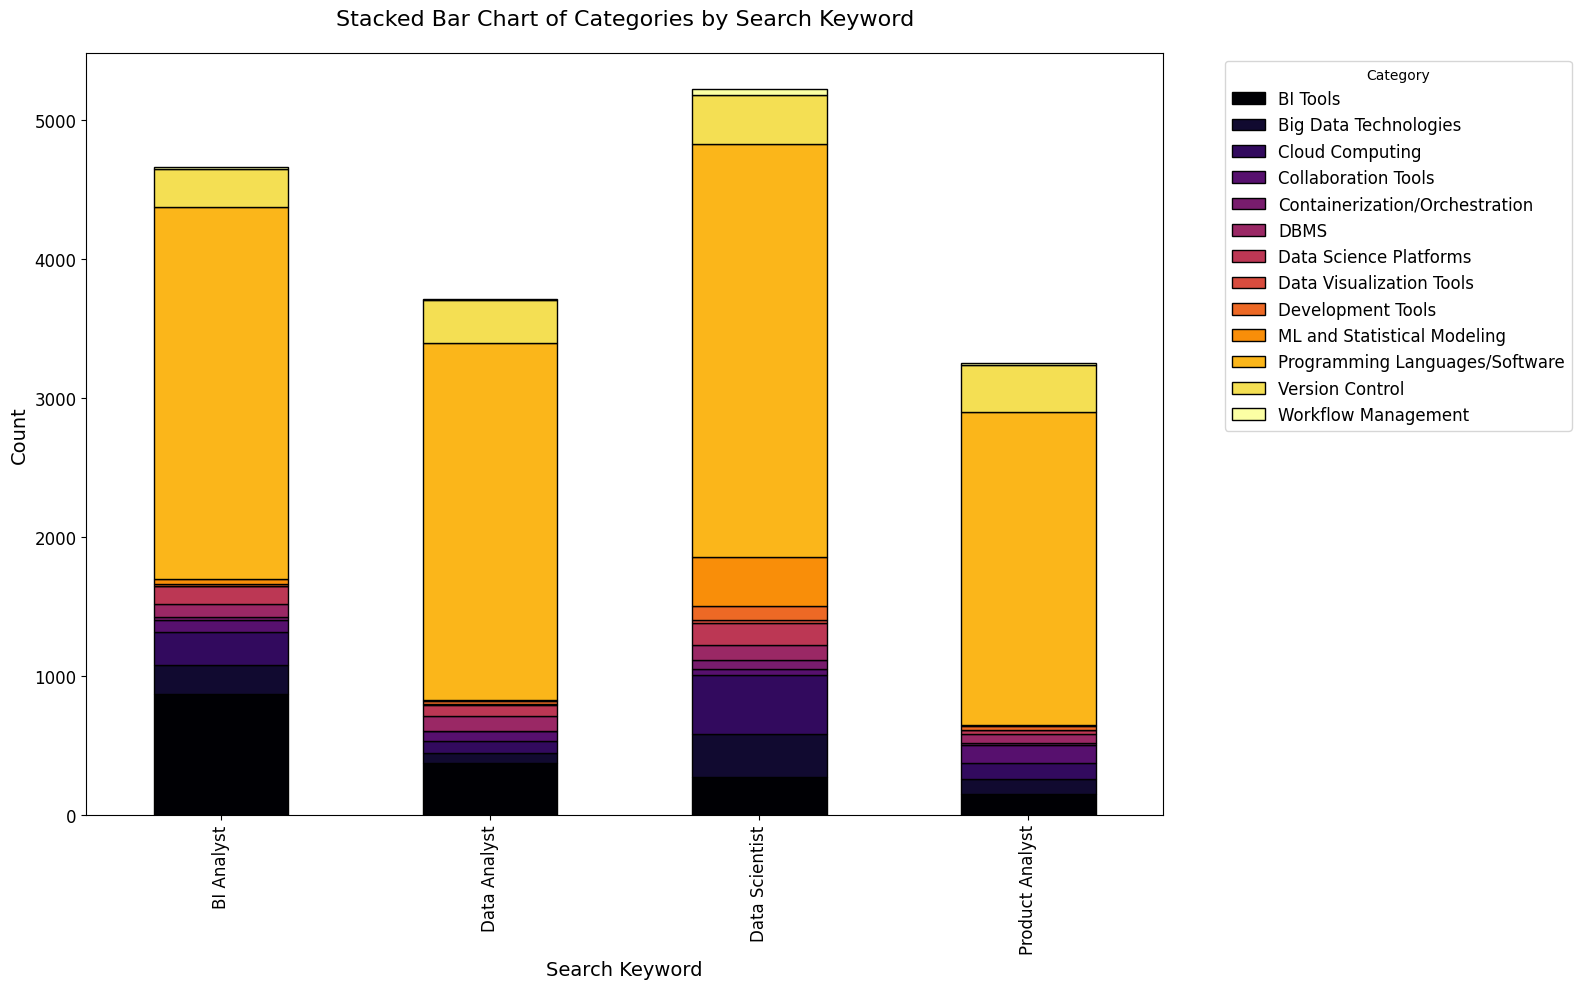

In [66]:
pf.plot_stacked_bar_chart(technical_skills)

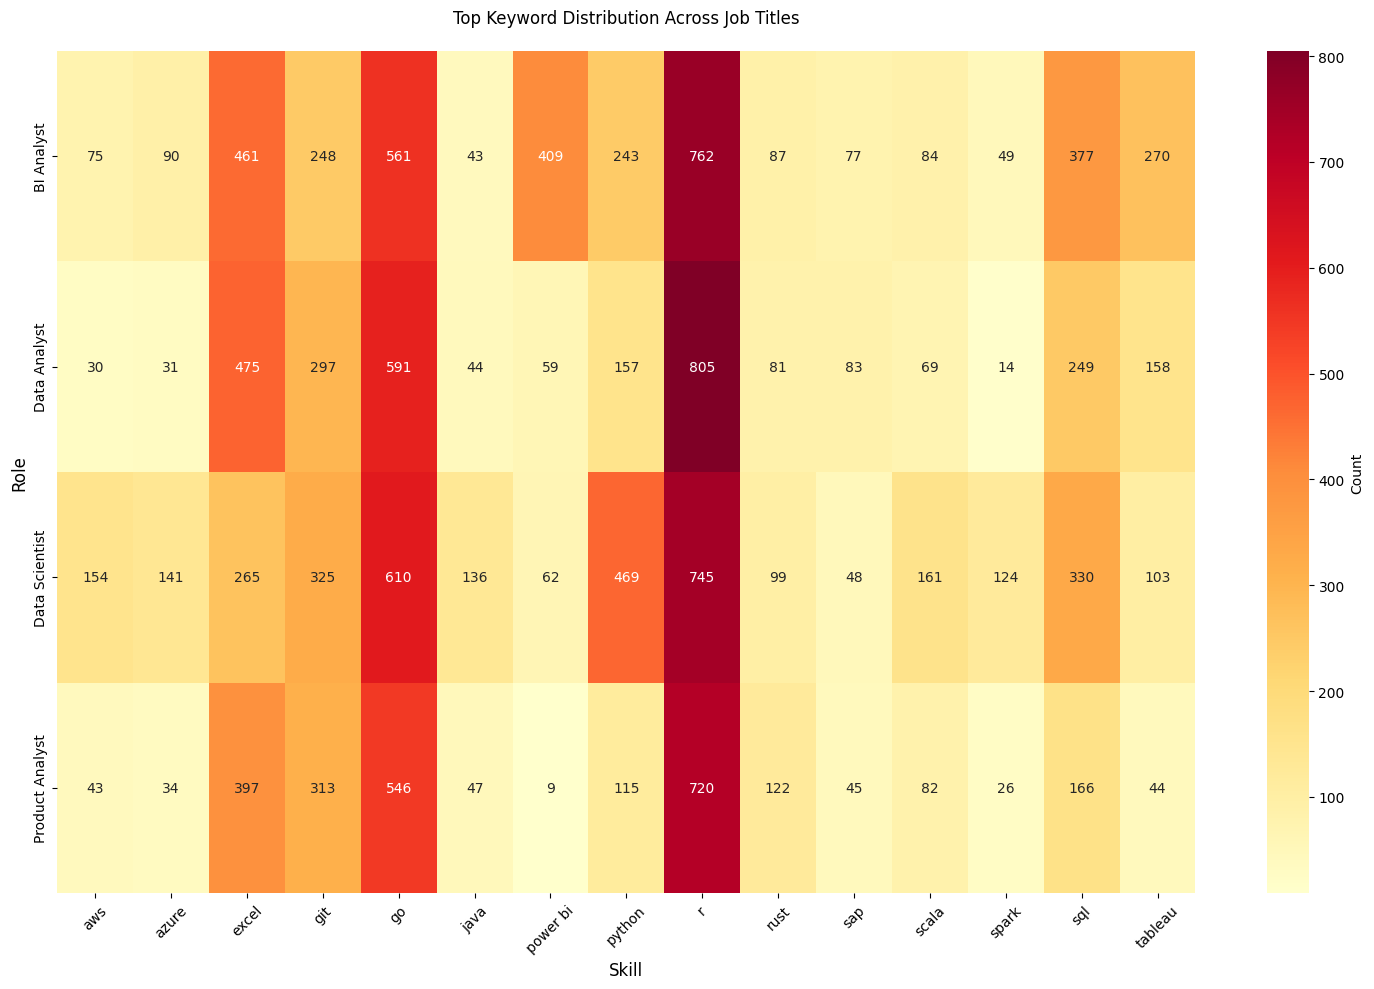

In [67]:
# Skills for different roles 
pf.plot_top_keyword_heatmap(technical_skills)

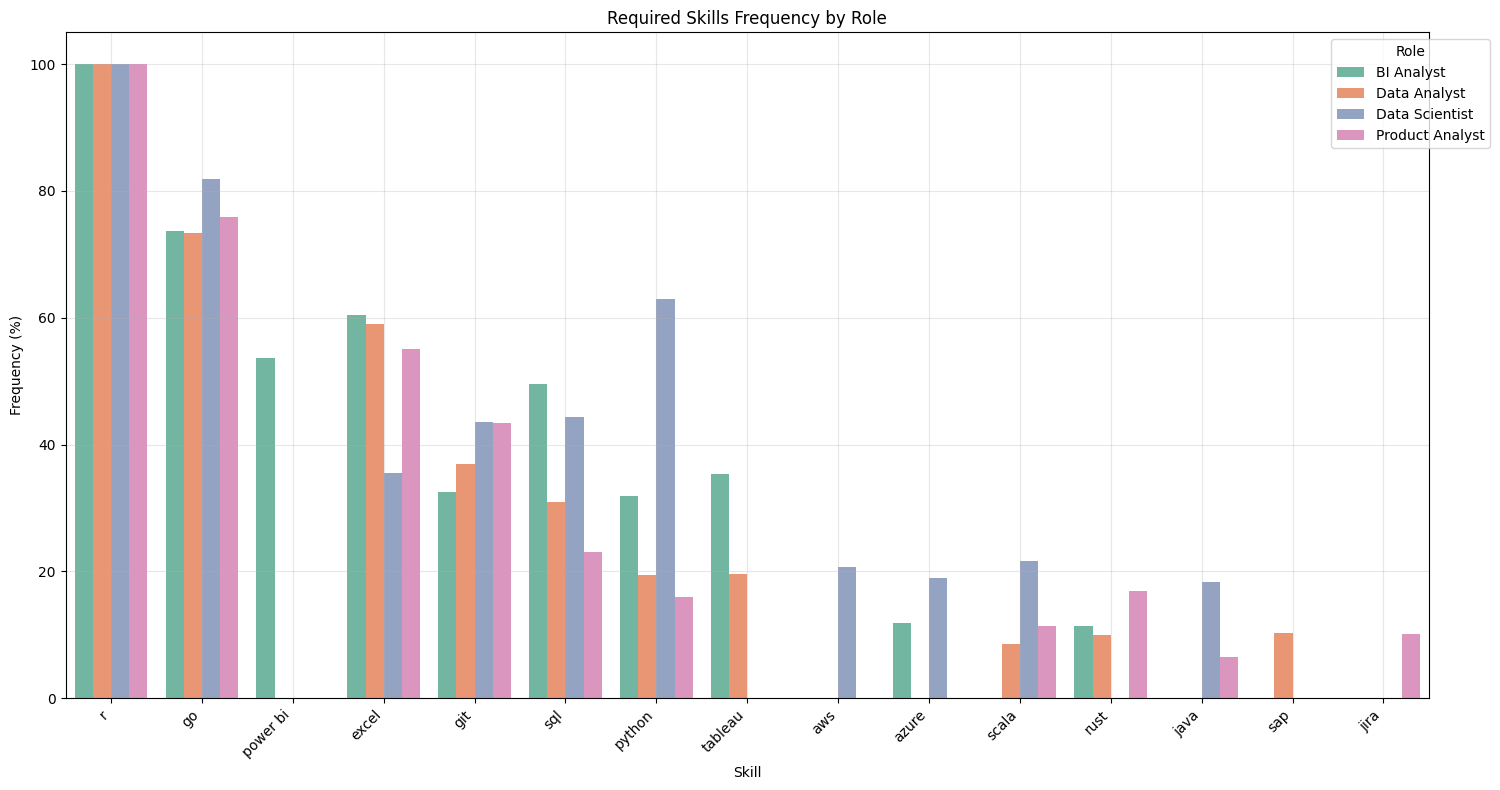

In [68]:
pf.plot_skills_bars(top_skills_by_role)

In [69]:
#plot_pentagon_keywords(top_skills_by_role)

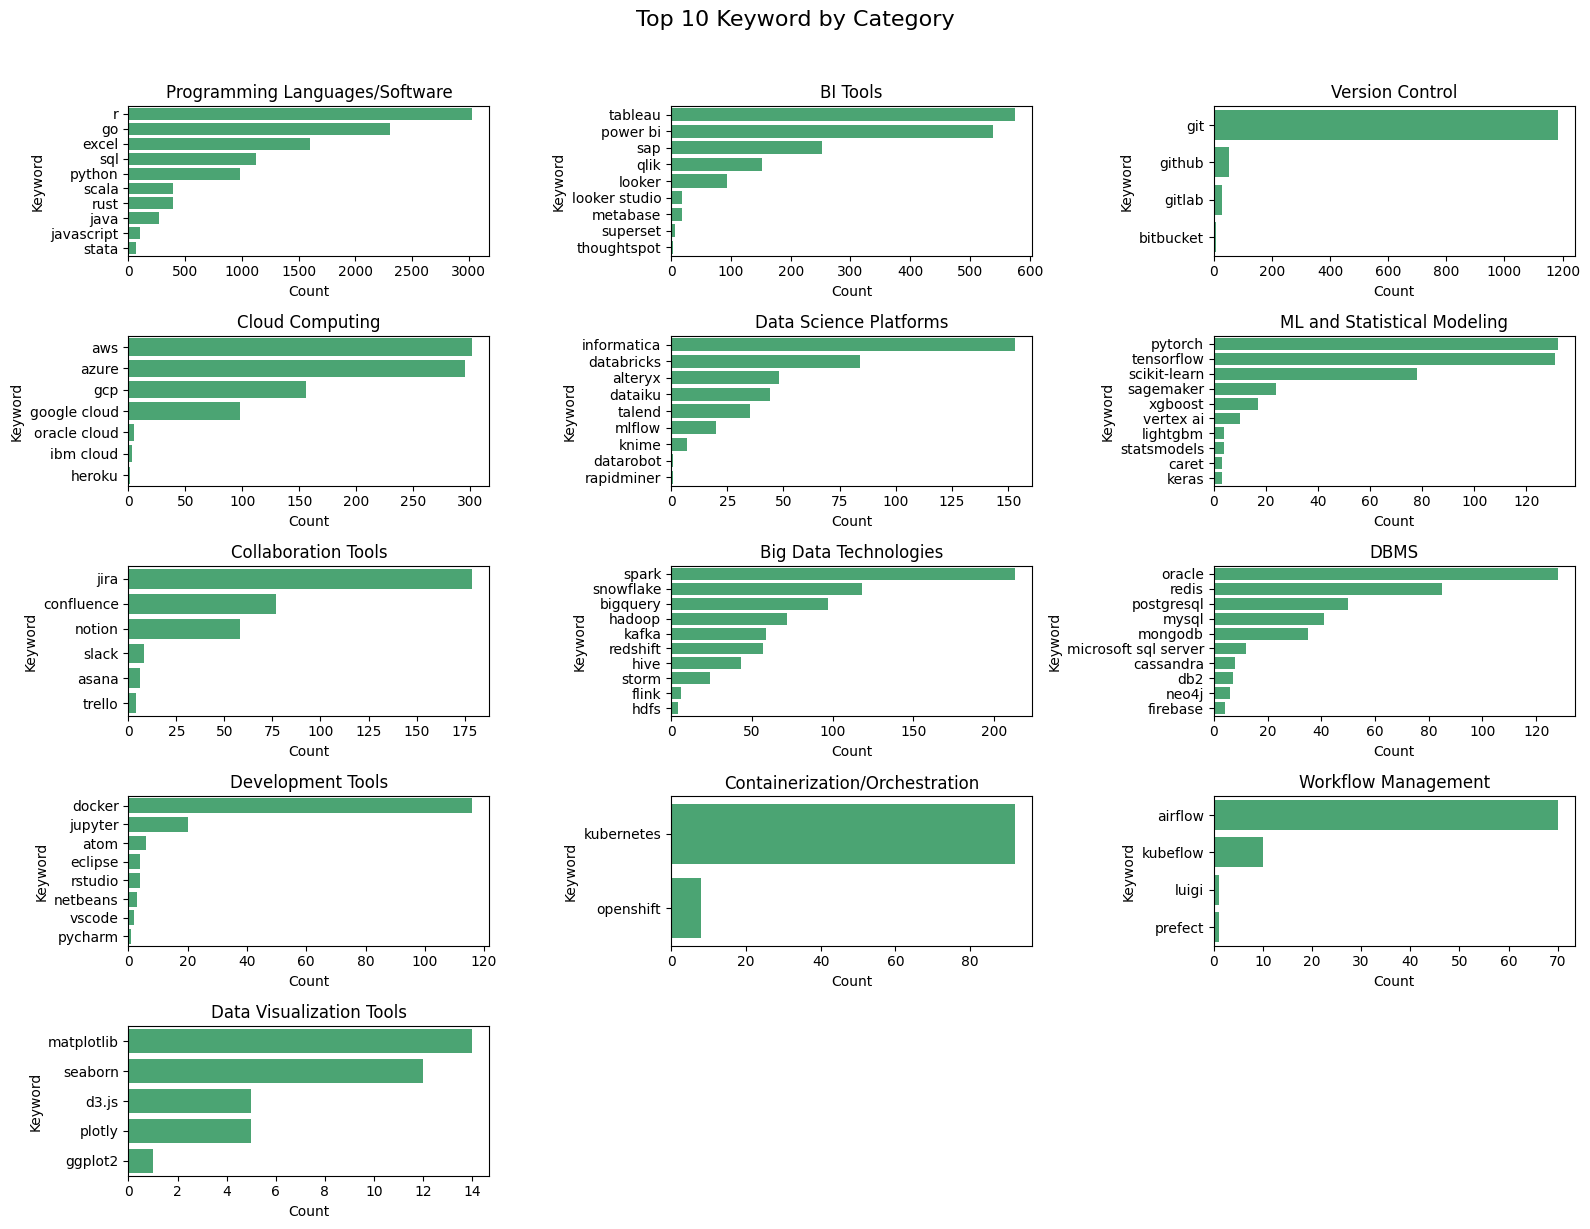

In [70]:
pf.plot_keywords_per_group_subplots(df=technical_skills, group_col='Category', keyword_col='Keyword', count_col='Count', n_top=10)

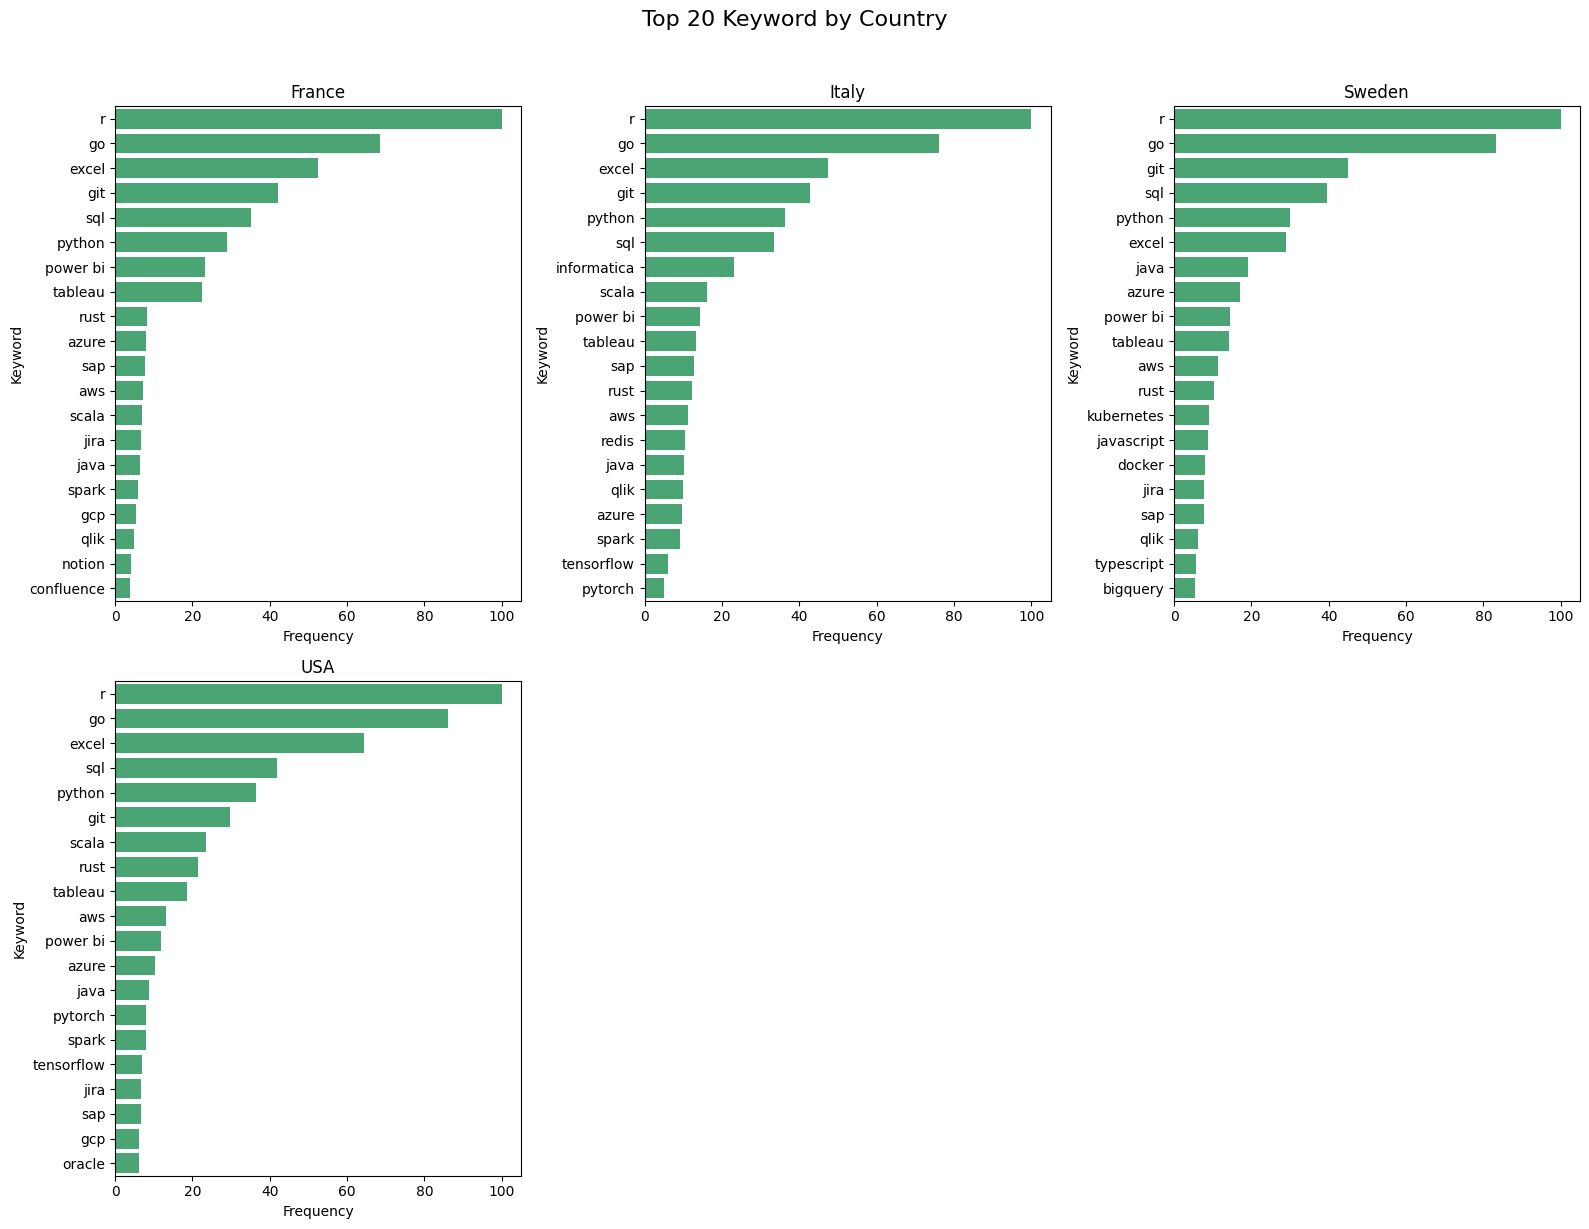

In [71]:
top_skills_by_country.head()
pf.plot_keywords_per_group_subplots(df=skills_country, group_col='Country', keyword_col='Keyword', count_col='Frequency', n_top=20)

In [72]:
global_skills.head()

Category Keyword  Count  Frequency  Total_jobs
94   Programming Languages/Software       r   3032     100.00        3032
86   Programming Languages/Software      go   2308      76.12        3032
85   Programming Languages/Software   excel   1598      52.70        3032
104                 Version Control     git   1183      39.02        3032
99   Programming Languages/Software     sql   1122      37.01        3032

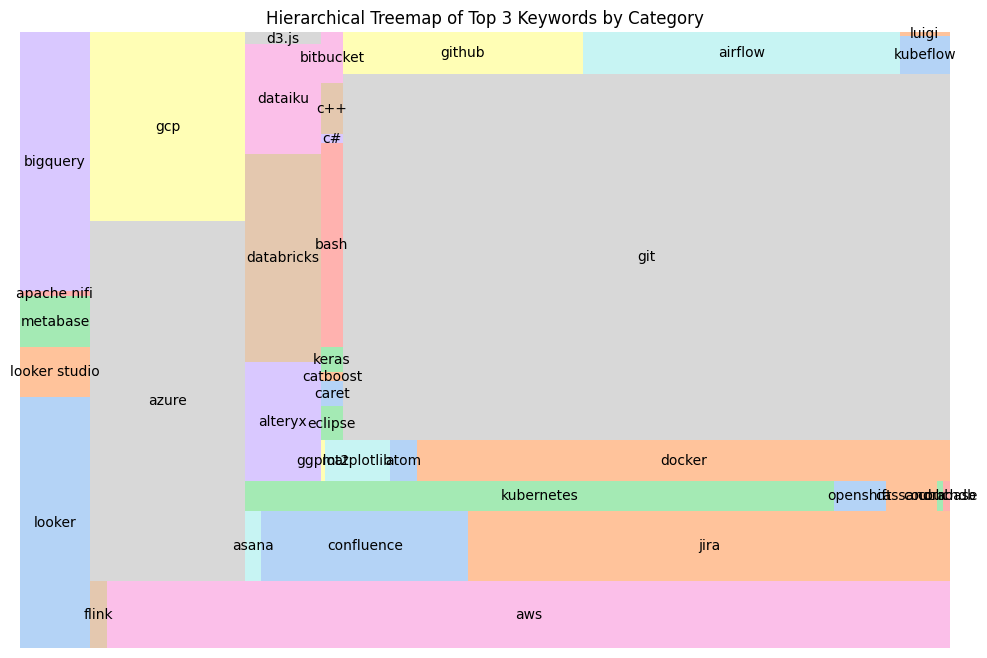

In [73]:
import squarify 

# Group data by category and sum up the counts
grouped_data = global_skills.groupby(['Category', 'Keyword'])['Count'].sum().reset_index()

# Filter top 10 keywords per category
top_keywords = grouped_data.groupby('Category').head(3)

# Create a color palette
colors = sns.color_palette("pastel", len(top_keywords['Category'].unique()))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_keywords['Count'], label=top_keywords['Keyword'], alpha=.8, color=colors)
plt.axis('off')
plt.title('Hierarchical Treemap of Top 3 Keywords by Category')
plt.show()

In [74]:
# Categorical variables
categorical_cols = ['search_keyword', 'country', 'job_title', 'company_name', 'company_location']

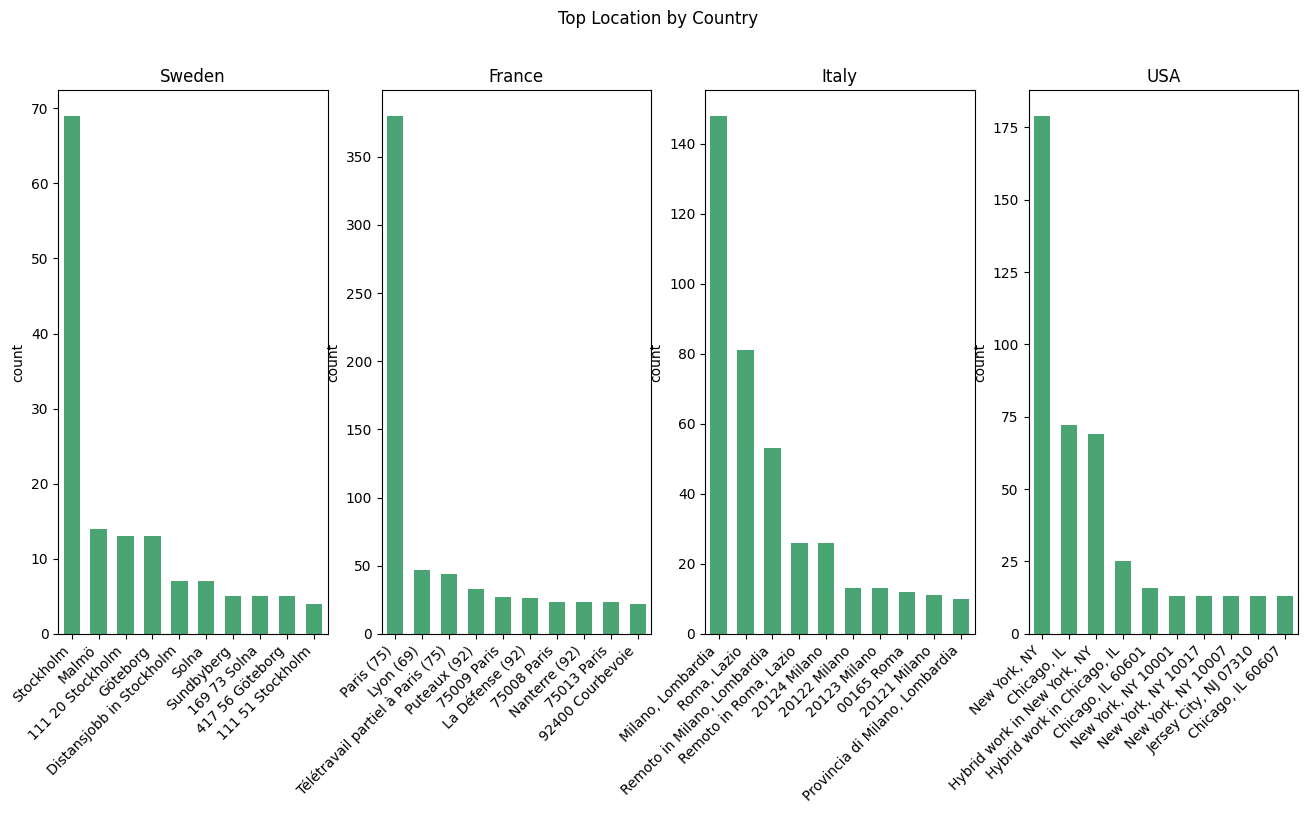

In [75]:
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='company_location',
    title='Top Location by Country'
)

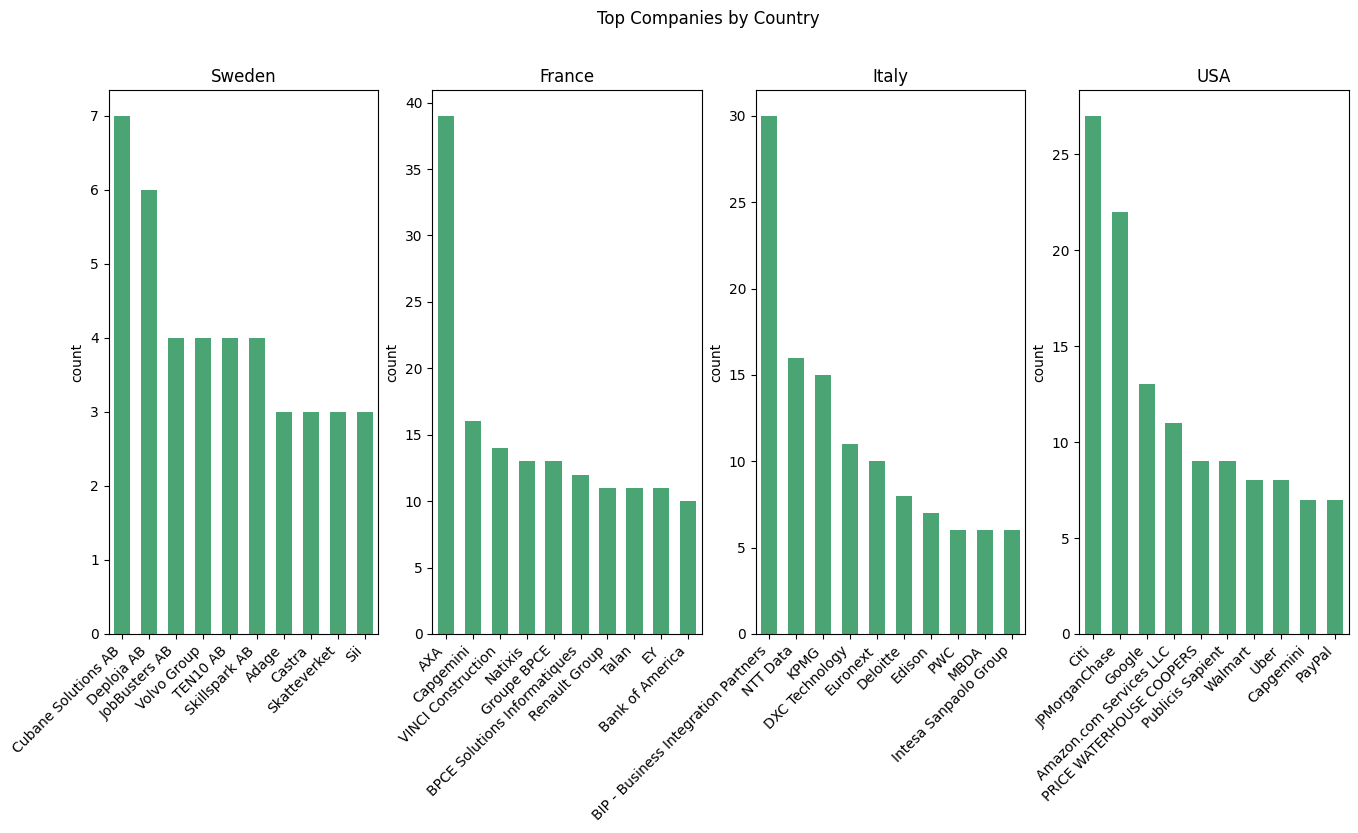

In [76]:
# Plot top company names per country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='company_name',
    title='Top Companies by Country'
)

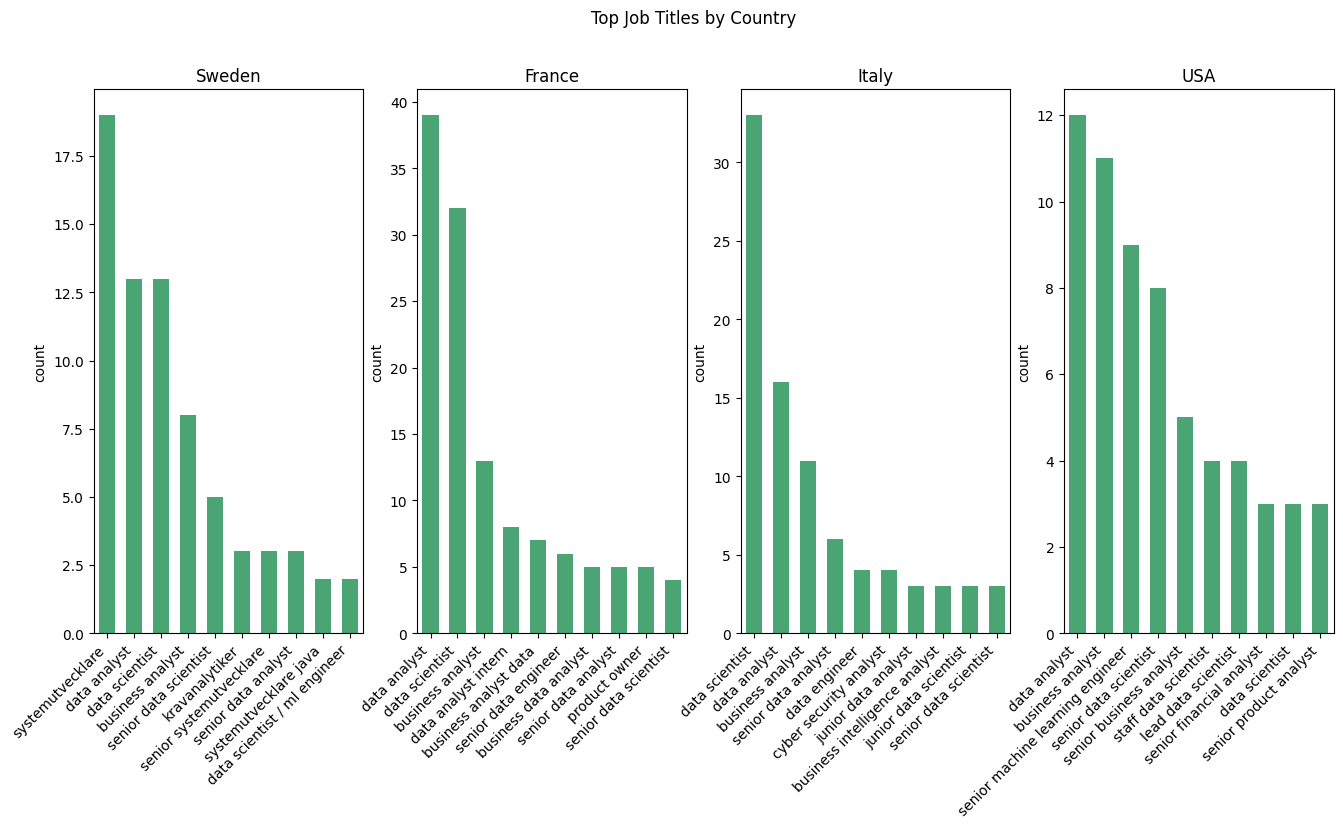

In [77]:
# For job titles by country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='job_title',
    title='Top Job Titles by Country'
)

### Numerical features

Shape of melted data: (6064, 2)
Number of non-null values per column:
Variable         6064
EUR per month    1598
dtype: int64

Outliers for min_salary_month_EUR:
Number of outliers: 8
Outlier values:
€18,880.57
€19,503.87
€19,724.79
€19,724.79
€19,969.38
€19,969.38
€20,158.74
€20,513.78
Lower bound: €0.00
Upper bound: €18,541.30

Outliers for max_salary_month_EUR:
Number of outliers: 3
Outlier values:
€29,216.36
€31,472.88
€31,559.67
Lower bound: €0.00
Upper bound: €28,799.04


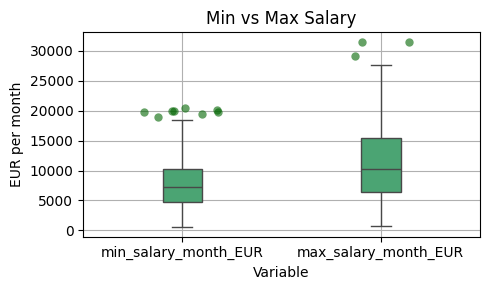

Summary statistics for salary columns:
       min_salary_month_EUR  max_salary_month_EUR
count                 799.0                 799.0
mean                7755.22              11114.01
std                 3886.59               5963.43
min                   500.0                 800.0
25%                 4733.95               6442.87
50%                 7267.72              10264.78
75%                10256.89              15385.34
max                20513.78              31559.67


In [78]:
# Summary statistics and boxplots for salary (outliers with jitter to more easily see them)
salary_cols = ['min_salary_month_EUR', 'max_salary_month_EUR']
outliers_df, outlier_rows = pf.plot_boxplot(df_combined, salary_cols)

print('Summary statistics for salary columns:')
print(df_combined[salary_cols].describe().round(2)) 

In [79]:
outlier_rows[['search_keyword', 'country', 'company_location', 'job_title', 'job_description_norm', 'min_salary_month_EUR', 'max_salary_month_EUR', 'outlier_source']]

search_keyword country                   company_location  \
2413  Data Scientist     USA                       New York, NY   
2438  Data Scientist     USA        Hybrid work in New York, NY   
2440  Data Scientist     USA  Hybrid work in New York, NY 10011   
2613      BI Analyst     USA                       New York, NY   
2614      BI Analyst     USA                       New York, NY   
2629      BI Analyst     USA                       New York, NY   
2657      BI Analyst     USA                       New York, NY   
2852  Data Scientist     USA                        Chicago, IL   
2354  Data Scientist     USA                 New York, NY 10001   

                                              job_title  \
2413                     grp dir, data sci/adv alt -svp   
2438                             founding ml researcher   
2440                             director, data science   
2613  executive director – data & analytics operatio...   
2614  executive director – data & analytics operatio...   
2629       vice president, pgs ai data analytics leader   
2657    vp, operational excellence & business analytics   
2852             senior/lead c++ engineer - market data   
2354  ai strategy & design - healthcare sector - sen...   

                                   job_description_norm  min_salary_month_EUR  \
2413  basic information location ny ny 100 w 33rd po...          20513.783333   
2438  garden garden gardenintel.com accelerates glob...          19724.791667   
2440  role peloton seeking experienced leader field ...             19503.874   
2613  reporting svp cross medium measurement  advanc...          19969.379083   
2614  executive director – data  analytics operation...          19969.379083   
2629  pfizer’s purpose breakthrough change patients’...          18880.570583   
2657  bizops sourcing  strategy group heart transfor...          20158.737083   
2852  ctc cutting-edge proprietary trading firm long...          19724.791667   
2354  ey you’ll chance build career unique are globa...          11251.021167   

      max_salary_month_EUR         outlier_source  
2413          22880.758333             min salary  
2438          31559.666667  min salary,max salary  
2440          25358.192167             min salary  
2613          26778.377167             min salary  
2614          26778.377167             min salary  
2629          31472.877583  min salary,max salary  
2657           25918.37625             min salary  
2852          20513.783333             min salary  
2354          29216.361417             max salary

What are these outliers representing and where are they coming from? 
- All from USA (mostly NY). 
- Founder, director, vice president, VP, and other senior roles. 

Lets also look at the smallest salaries and where they come from. 

In [80]:
# Get min salaries and see if there is a pattern
min_salaries = (df_combined
                  .dropna(subset=['min_salary_month_EUR'])  # Remove rows with NA salaries
                  .nsmallest(10, 'min_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'country', 'company_location', 'min_salary_month_EUR', 'salary']])

min_salaries

search_keyword                                          job_title  \
1701    Data Analyst                                     junior analyst   
265     Data Analyst                alternance - assistant data analyst   
1289      BI Analyst      alternant(e) data analyst connaissance client   
291     Data Analyst    alternant data analyst en business intelligence   
1825    Data Analyst                                cloud/data engineer   
653   Data Scientist                        stage - data analyst junior   
1693    Data Analyst                     logistics analyst - internship   
730   Data Scientist                            alternance data analyst   
515     Data Analyst  transversal business analyst - stage - paris (...   
1410      BI Analyst                               data analyst - stage   

                   company_name country  \
1701                 Wayshi srl   Italy   
265                  CMI France  France   
1289                 IMX FRANCE  France   
291                   HEC Paris  France   
1825  Quick Algorithm Analytics   Italy   
653                         AXA  France   
1693                    Samsung   Italy   
730            The Nuum Factory  France   
515                   papernest  France   
1410      SAS Terroirs d'Avenir  France   

                                  company_location  min_salary_month_EUR  \
1701                                  20122 Milano                 500.0   
265   Télétravail partiel à 92300 Levallois-Perret                 721.0   
1289            Télétravail partiel à 93500 Pantin                759.78   
291                            78350 Jouy-en-Josas                 800.0   
1825                   Remoto in Milano, Lombardia                 800.0   
653                                  Suresnes (92)                 832.0   
1693                             Milano, Lombardia                 900.0   
730                                  69009 Lyon 9e                 926.0   
515              Télétravail partiel à 75019 Paris                1000.0   
1410   Télétravail partiel à 94400 Vitry-sur-Seine                1000.0   

                                                 salary  
1701                            500 € - 1.300 € al mese  
265         De 721 € à 1 747 € par mois  -   Alternance  
1289  De 759,78 € à 1 766,92 € par mois  -   Alternance  
291         De 800 € à 1 500 € par mois  -   Alternance  
1825                                      800 € al mese  
653   De 832 € à 1 868 € par mois  -   Temps partiel...  
1693                                      900 € al mese  
730          À partir de 926 € par mois  -   Alternance  
515            De 1 000 € à 1 300 € par mois  -   Stage  
1410     De 1 000 € à 1 400 € par mois  -   Temps plein

The lowest salaries are from France and Italy, for internships, 'alternance', and junior roles. 

In [81]:
# Get top salaries in France and see if there is a pattern
top_fr_salaries = (df_combined[df_combined['country'] == 'France']
                  .dropna(subset=['max_salary_month_EUR'])  # Remove rows with NA salaries
                  .nlargest(10, 'max_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'company_location', 'max_salary_month_EUR', 'salary']])

top_fr_salaries

search_keyword                                          job_title  \
1562       BI Analyst  cloud analyste informatique - azure aws finops...   
1020  Product Analyst                  data gouvernance (it) / freelance   
1451       BI Analyst  data analyste informatique expert sas (it) / f...   
490      Data Analyst  senior data analyste informatique / data gouve...   
384      Data Analyst  géologiste - data analyste informatique - 270 ...   
406      Data Analyst  business data analyste informatique - solvency...   
1309       BI Analyst  geodata scientist / analyste informatique (it)...   
1371       BI Analyst  data analyste informatique / développeur bi ta...   
1477       BI Analyst  business analyste informatique - gm / emtn (it...   
771   Product Analyst         business analyst si gestion des défauts...   

                    company_name          company_location  \
1562                 PROPULSE IT  Télétravail à Paris (75)   
1020                    PARTENOR                Paris (75)   
1451          Cogniwave dynamics                Paris (75)   
490                      LeHibou                Paris (75)   
384                    ISUPPLIER                Paris (75)   
406                      NEXORIS                Paris (75)   
1309  ODHCOM - FREELANCEREPUBLIK                Paris (75)   
1371                Bek Advisory                Paris (75)   
1477                     NEXORIS                Paris (75)   
771                  1Dsolutions                Paris (75)   

      max_salary_month_EUR                                             salary  
1562               18000.0  De 450 € à 900 € par jour  -   Statut cadre, I...  
1020               15200.0  De 520 € à 760 € par jour  -   Indépendant / f...  
1451               14000.0  De 600 € à 700 € par jour  -   Indépendant / f...  
490                13000.0        650 € par jour  -   Indépendant / freelance  
384                12900.0        645 € par jour  -   Indépendant / freelance  
406                12000.0  De 550 € à 600 € par jour  -   Indépendant / f...  
1309               12000.0  De 480 € à 600 € par jour  -   Indépendant / f...  
1371               12000.0        600 € par jour  -   Indépendant / freelance  
1477               12000.0  De 590 € à 600 € par jour  -   Indépendant / f...  
771                11000.0                    550 € par jour  -   Temps plein

Highest salaries in France are for indépendant / freelance jobs in Paris, paid by day rate. 

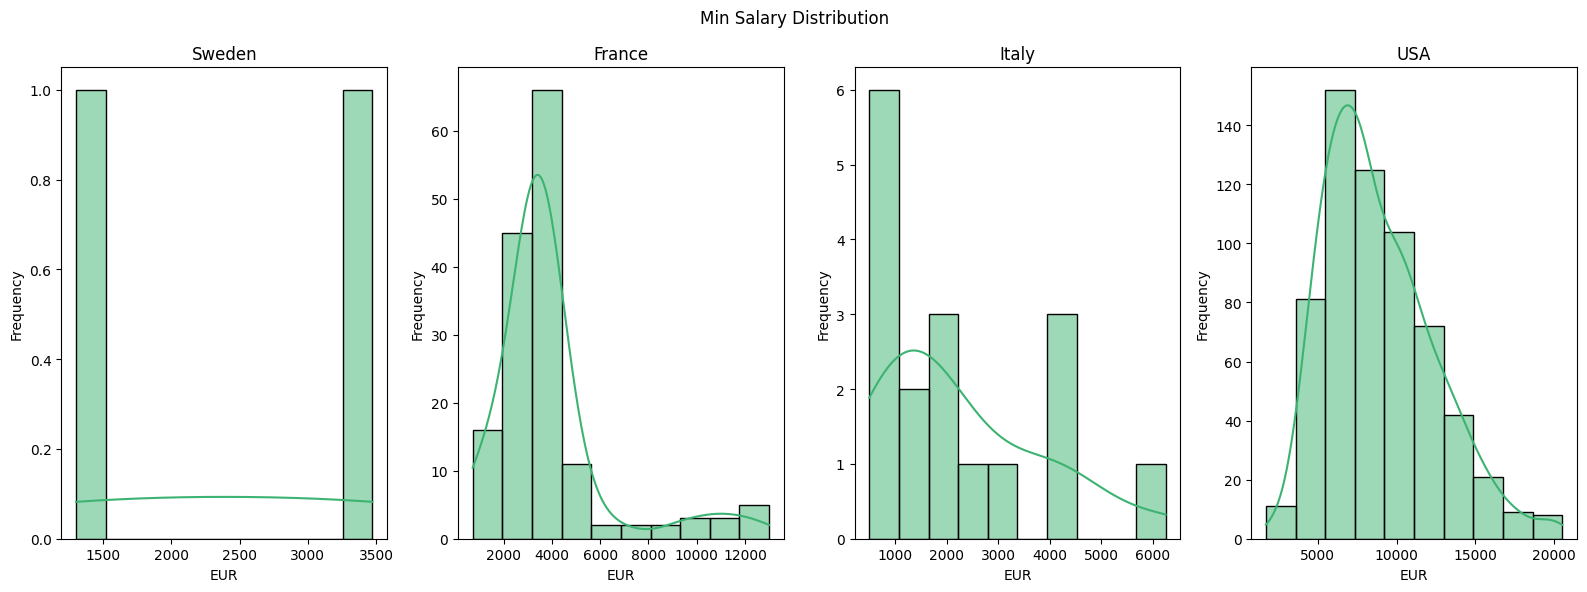

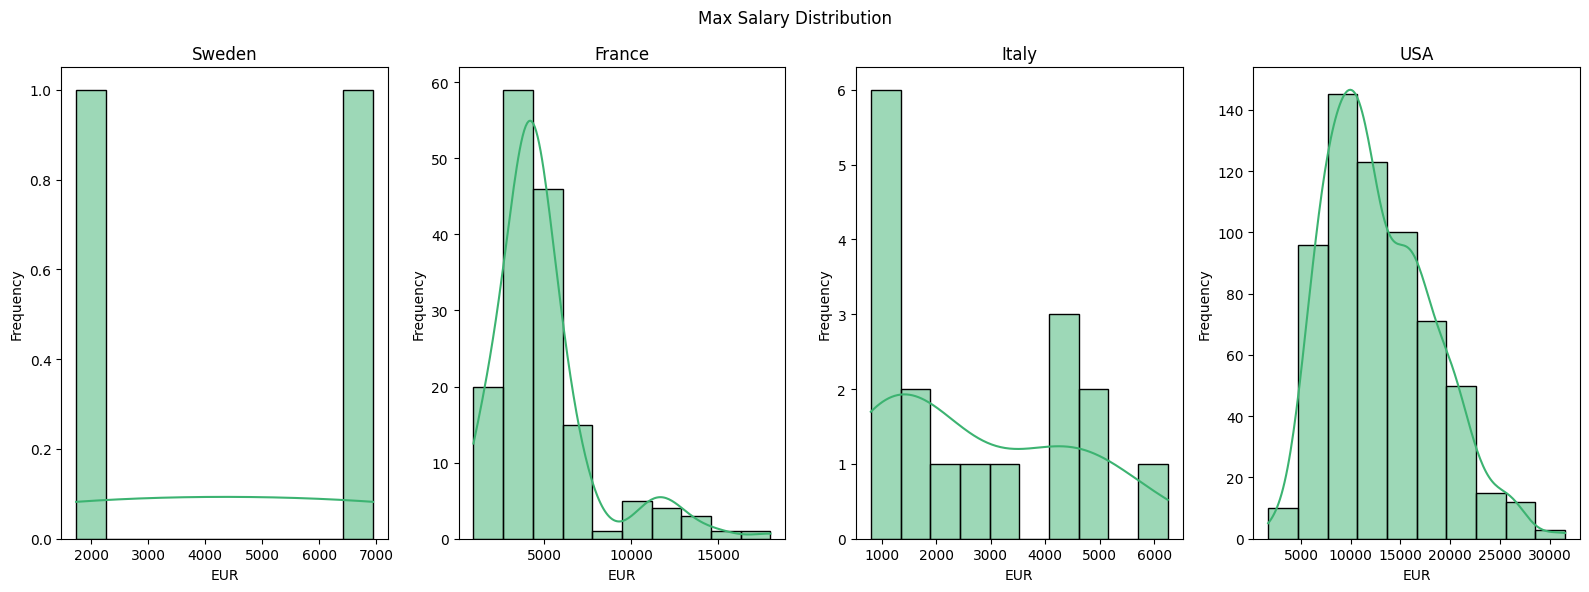

In [82]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[0], 
    bins = 10, 
    kde = True, 
    title = 'Min Salary Distribution'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[1], 
    bins = 10, 
    kde = True, 
    title = 'Max Salary Distribution'
)

In [83]:
salary_ranges = (
    df_combined
    .groupby('country', observed=True)
    .agg({
        'min_salary_month_EUR': 'min',
        'max_salary_month_EUR': 'max'
    })
    .rename(columns={
        'min_salary_month_EUR': 'Lowest Monthly Salary (EUR)',
        'max_salary_month_EUR': 'Highest Monthly Salary (EUR)'
    })
)

salary_ranges

Lowest Monthly Salary (EUR)  Highest Monthly Salary (EUR)
country                                                           
France                         721.0                       18000.0
Italy                          500.0                        6250.0
Sweden                        1302.3                        6945.6
USA                         1704.222                  31559.666667

Lets look into the second peaks (e.g. max salary for France, with second peak after 10 000 EUR). 

In [84]:
# Filter by country 
filtered_df = df_combined[(df_combined['country'] == 'France') & 
                         (df_combined['min_salary_month_EUR'].notna())]

# Filter salary range 
filtered_df = filtered_df[(filtered_df['max_salary_month_EUR'] > 10000) & 
           (filtered_df['max_salary_month_EUR'] < 16000)]

filtered_df.head()

job_id  page                                           job_link  \
384      639    22  https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...   
406      705    26  https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...   
490      882    38  https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...   
771     1414     2  https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...   
1017    1750    24  https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...   

       search_keyword search_location  \
384      Data Analyst      Paris (75)   
406      Data Analyst      Paris (75)   
490      Data Analyst      Paris (75)   
771   Product Analyst      Paris (75)   
1017  Product Analyst      Paris (75)   

                                              job_title company_name  \
384   géologiste - data analyste informatique - 270 ...    ISUPPLIER   
406   business data analyste informatique - solvency...      NEXORIS   
490   senior data analyste informatique / data gouve...      LeHibou   
771          business analyst si gestion des défauts...  1Dsolutions   
1017  data analyste informatiquee gcp / sql / big qu...     HIGHTEAM   

                 company_location  \
384                    Paris (75)   
406                    Paris (75)   
490                    Paris (75)   
771                    Paris (75)   
1017  Télétravail à Île-de-France   

                                                 salary  \
384         645 € par jour  -   Indépendant / freelance   
406   De 550 € à 600 € par jour  -   Indépendant / f...   
490         650 € par jour  -   Indépendant / freelance   
771                     550 € par jour  -   Temps plein   
1017  De 500 € à 550 € par jour  -   Indépendant / f...   

                                        job_description  ...         region  \
384   Compétences : géologie ? biostratigraphie / sé...  ...  Île-de-France   
406   Nous recherchons, pour l'un de nos partenaire ...  ...  Île-de-France   
490   Analyse de l?existant et recommandations techn...  ...  Île-de-France   
771   TJM 550€ 
 
 
 
 
 
 
 
 
 
 PARIS 
 
 
 
 
 
...  ...  Île-de-France   
1017  Une offre de solutions de data analyse et de c...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
384   France      645.0      645.0     euro       day            12900.0   
406   France      550.0      600.0     euro       day            11000.0   
490   France      650.0      650.0     euro       day            13000.0   
771   France      550.0      550.0     euro       day            11000.0   
1017  France      500.0      550.0     euro       day            10000.0   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
384              12900.0               12900.0              12900.0  
406              12000.0               11000.0              12000.0  
490              13000.0               13000.0              13000.0  
771              11000.0               11000.0              11000.0  
1017             11000.0               10000.0              11000.0  

[5 rows x 25 columns]

In [85]:
identical_cols = filtered_df.apply(lambda x: len(x.unique()) == 1)
print("Columns with identical values:", identical_cols[identical_cols].index.tolist())
print("\nThe identical values are:")

for col in identical_cols[identical_cols].index:
    print(f"{col}: {filtered_df[col].iloc[0]}")

filtered_df[filtered_df.apply(lambda x: len(x.unique()) == 1).index].head()

Columns with identical values: ['date', 'language', 'country', 'currency', 'time_unit']

The identical values are:
date: 2024-09-20 00:00:00
language: french
country: France
currency: euro
time_unit: day


job_id  page                                           job_link  \
384      639    22  https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...   
406      705    26  https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...   
490      882    38  https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...   
771     1414     2  https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...   
1017    1750    24  https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...   

       search_keyword search_location  \
384      Data Analyst      Paris (75)   
406      Data Analyst      Paris (75)   
490      Data Analyst      Paris (75)   
771   Product Analyst      Paris (75)   
1017  Product Analyst      Paris (75)   

                                              job_title company_name  \
384   géologiste - data analyste informatique - 270 ...    ISUPPLIER   
406   business data analyste informatique - solvency...      NEXORIS   
490   senior data analyste informatique / data gouve...      LeHibou   
771          business analyst si gestion des défauts...  1Dsolutions   
1017  data analyste informatiquee gcp / sql / big qu...     HIGHTEAM   

                 company_location  \
384                    Paris (75)   
406                    Paris (75)   
490                    Paris (75)   
771                    Paris (75)   
1017  Télétravail à Île-de-France   

                                                 salary  \
384         645 € par jour  -   Indépendant / freelance   
406   De 550 € à 600 € par jour  -   Indépendant / f...   
490         650 € par jour  -   Indépendant / freelance   
771                     550 € par jour  -   Temps plein   
1017  De 500 € à 550 € par jour  -   Indépendant / f...   

                                        job_description  ...         region  \
384   Compétences : géologie ? biostratigraphie / sé...  ...  Île-de-France   
406   Nous recherchons, pour l'un de nos partenaire ...  ...  Île-de-France   
490   Analyse de l?existant et recommandations techn...  ...  Île-de-France   
771   TJM 550€ 
 
 
 
 
 
 
 
 
 
 PARIS 
 
 
 
 
 
...  ...  Île-de-France   
1017  Une offre de solutions de data analyse et de c...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
384   France      645.0      645.0     euro       day            12900.0   
406   France      550.0      600.0     euro       day            11000.0   
490   France      650.0      650.0     euro       day            13000.0   
771   France      550.0      550.0     euro       day            11000.0   
1017  France      500.0      550.0     euro       day            10000.0   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
384              12900.0               12900.0              12900.0  
406              12000.0               11000.0              12000.0  
490              13000.0               13000.0              13000.0  
771              11000.0               11000.0              11000.0  
1017             11000.0               10000.0              11000.0  

[5 rows x 25 columns]

Observations: 
- **Sweden**: Only has 2 data points. This was the smallest dataset but it also makes sense that there are few values isnce Swedish interview processes usually do not involve discussing salaries until the very end of the rounds. 
- **France**: It almost looks like there are two peaks. This is because we have several rows with high salaries for freelance work in Paris. 
- **Italy**: Also has a second peak for jobs in Milano. But this is also be since we have fewer data points. 
- **USA**: Significantly higher salaries overall, as to be expected. 

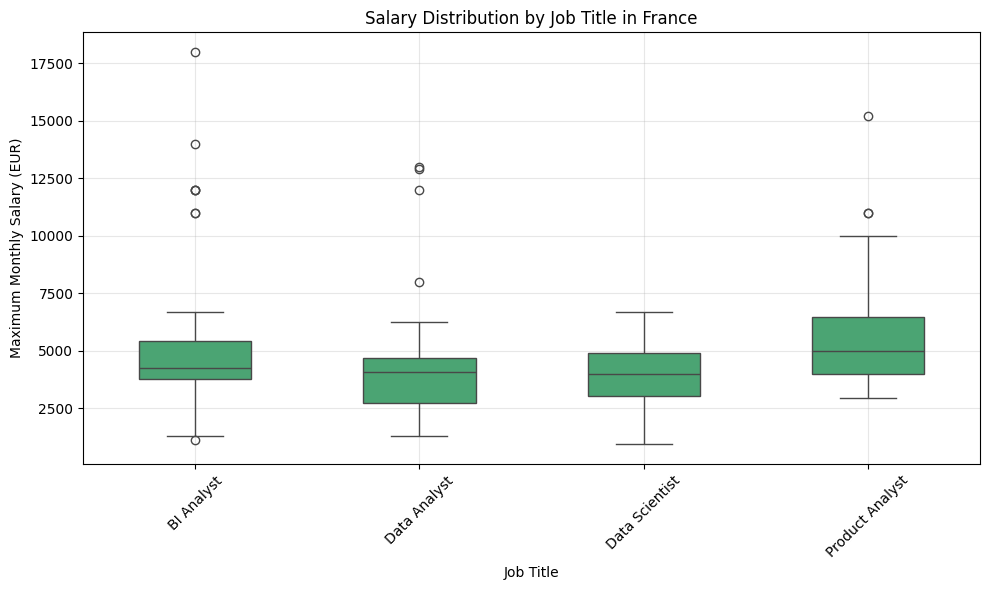

In [86]:
def plot_salary_by_keyword(df: pd.DataFrame, figsize: tuple[int, int] = (10, 6)) -> None:
    """Create boxplot of salaries by search keyword for France."""
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df.query("country == 'France'"),
        x='search_keyword',
        y='max_salary_month_EUR',
        color='mediumseagreen',
        width=0.5
    )
    
    plt.xlabel('Job Title')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title in France')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Use it like this:
plot_salary_by_keyword(df_combined)

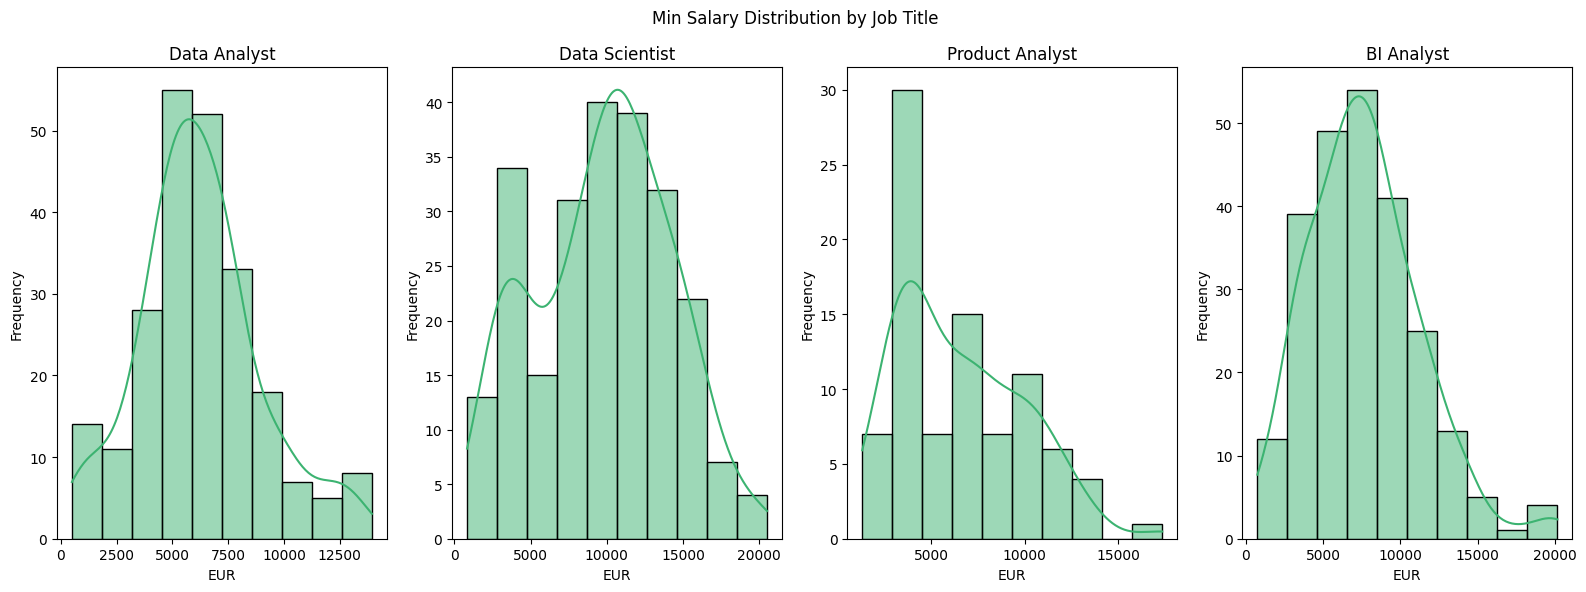

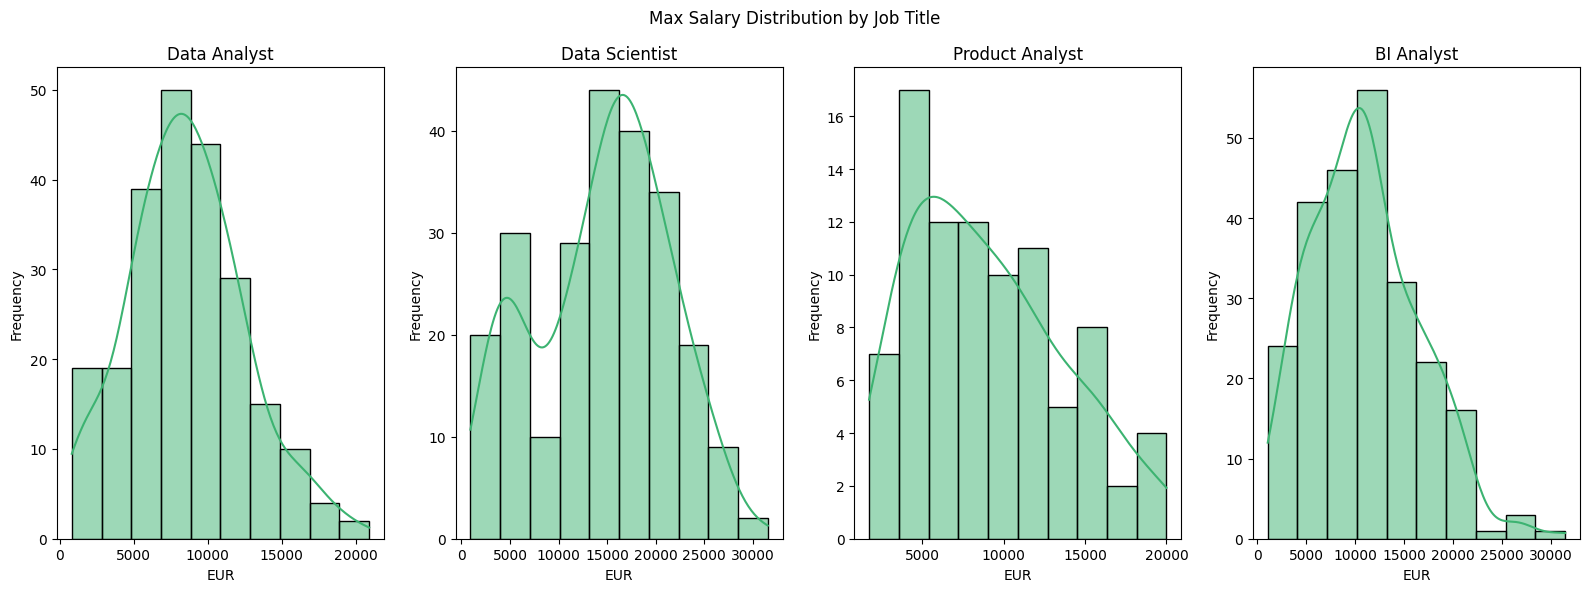

In [87]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution by Job Title'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution by Job Title'
)

## Bivariate analysis 

In [88]:
## Bivariate and Multivariate Analysis
# - Pairwise correlations
# - Relationships between key variables
# Statistical tests to see if there are significant differences in salaries for these search terms 

In [89]:
df_combined.columns

Index(['job_id', 'page', 'job_link', 'search_keyword', 'search_location',
       'job_title', 'company_name', 'company_location', 'salary',
       'job_description', 'date', 'language', 'job_description_norm',
       'city_name', 'department', 'region', 'country', 'min_salary',
       'max_salary', 'currency', 'time_unit', 'min_salary_monthly',
       'max_salary_monthly', 'min_salary_month_EUR', 'max_salary_month_EUR'],
      dtype='object')

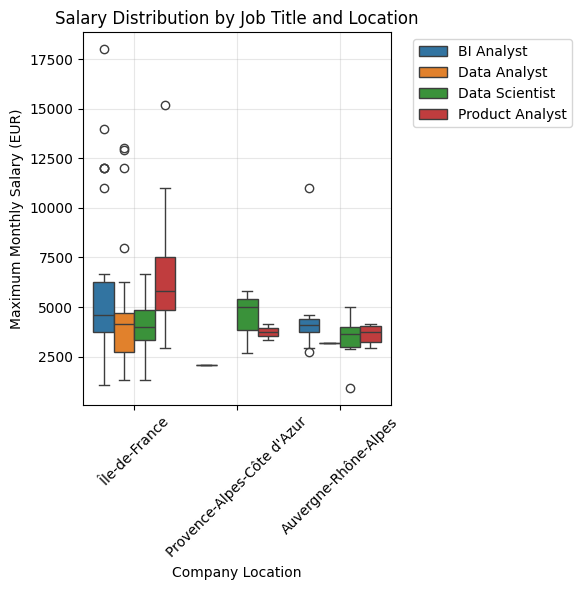

In [90]:
def plot_box(df: pd.DataFrame, 
            y: str = 'max_salary_month_EUR',
            x: str = 'region',
            hue: str = 'job_title',
            figsize: tuple[int, int] = (10, 6)) -> None:
    """
    Create boxplot showing salary distribution by location and job title.
    """
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df,
        x=x,          # locations on x-axis
        y=y,          # salary on y-axis
        hue=hue,      # separate boxes by job title
        width=0.8
    )
    
    plt.xlabel('Company Location')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title and Location')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Get the 10 most common locations
common_locations = (df_combined
                   .query("country == 'France'")
                   ['region']
                   .value_counts()
                   .nlargest(10)
                   .index)

# Plot using filtered data
plot_box(
    df=df_combined.query("country == 'France' and region in @common_locations"),
    y='max_salary_month_EUR', 
    x='region', 
    hue='search_keyword',
    figsize=(6, 6)
)

In [91]:
# Disregarding the country in question, are data scientist salaries significantly higher?

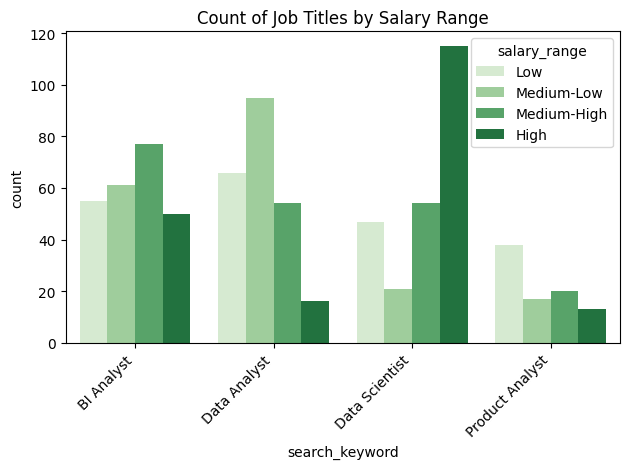

In [92]:
# Create salary bins
df_combined['salary_range'] = pd.qcut(
    df_combined['min_salary_month_EUR'], 
    q=4,  # Creates 4 equal-sized groups
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

# Create the plot with correct color syntax
sns.countplot(
    data=df_combined, 
    x='search_keyword', 
    hue='salary_range',
    palette='Greens'  # Using a green color palette
)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Job Titles by Salary Range')
plt.tight_layout()
plt.show()

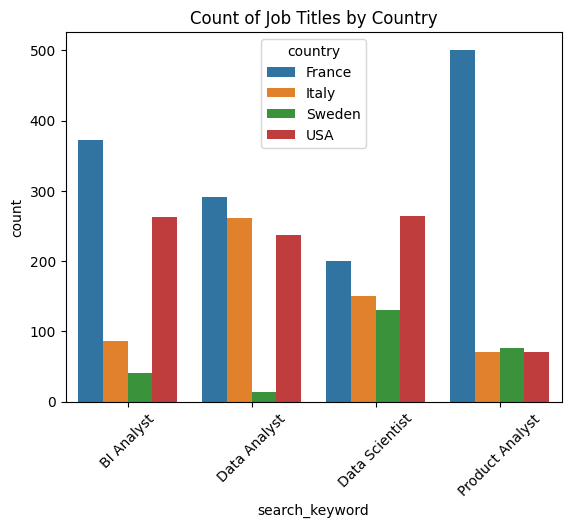

In [93]:
sns.countplot(data=df_combined, x='search_keyword', hue='country')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Country')
plt.show()

Why are there tons of Product Analyst jobs in France? Also tons of BI Analyst jobs. 
    
There are a bunch of data analyst (also data scientist) jobs that are very well paid. Do they have anything in common? 

In [94]:
import scipy.stats as stats
salary_ranges = pd.cut(df_combined['min_salary_month_EUR'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['<20k', '20-40k', '40-60k', '60-80k', '80-100k'])
crosstab = pd.crosstab(df_combined['search_keyword'], salary_ranges)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 1.3330236603128798, p-value: 0.7213066168568363


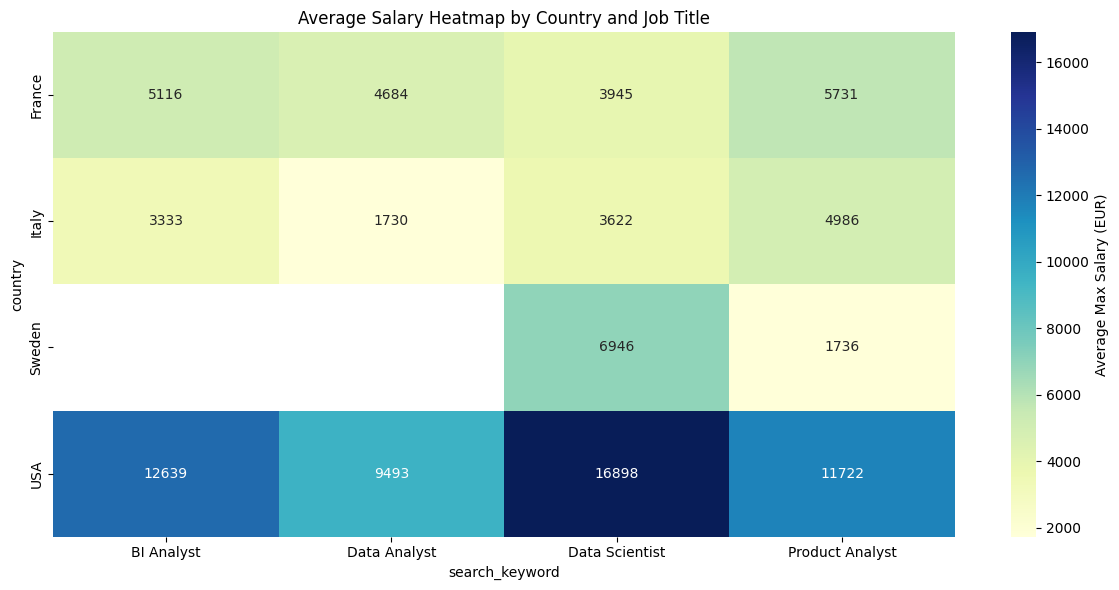

In [95]:
# Create pivot table with NA handling
pivot_table = df_combined.pivot_table(
    values='max_salary_month_EUR', 
    index='country', 
    columns='search_keyword', 
    aggfunc='mean', 
    observed=True
)

# Convert NA values to numbers that seaborn can handle
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.heatmap(
    pivot_table, 
    annot=True,  # Show values
    cmap='YlGnBu',  # Color scheme
    fmt='.0f',  # Round to 0 decimal places
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title')
plt.tight_layout()
plt.show()

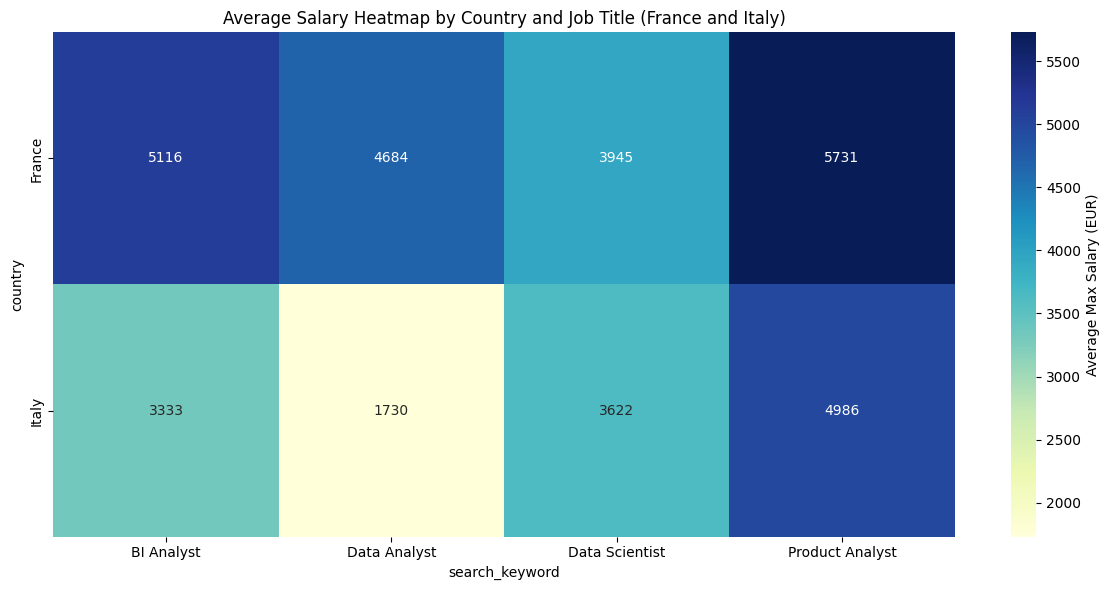

In [96]:
# Create pivot table excluding USA and Sweden
pivot_table = (df_combined[~df_combined['country'].isin(['USA', 'Sweden'])]
               .pivot_table(
                   values='max_salary_month_EUR', 
                   index='country', 
                   columns='search_keyword', 
                   aggfunc='mean', 
                   observed=True
               ))

# Convert NA values to numbers
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    cmap='YlGnBu',
    fmt='.0f',
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title (France and Italy)')
plt.tight_layout()
plt.show()

In [97]:
# Make one for different salaries and regions in France, or different parts of Paris

## Conclusions 

### Categorical features: 
- Common keywords: 
- Technical skills required: 
- Interview process: 
- Locations: 
    
### Numerical features: 
- Salaries: 
- Salaries that stood out:
- Combinations that led to high salary: 
- Locations versus salaries: 

Salaries: 
- As expected, salaries are significantly higher in the US. For some reason, maximum salaries appear to be for Data Analyst jobs?
- If you want to be well paid in Europe, it seems like a good idea to become a Data Scientist in Sweden, or Product Analyst in France or Italy. There are tons of jobs that fell under the 'Product Analyst' title for France. Have to look into this. It would be worth looking into the job descriptions of these titles in France and Italy to understand this better. There are too few data points for Sweden. 

- Job titles appear to vary somewhat between countries (since top 3 ones were different for different countries). 
- Clean up job titles for different countries? The search algorithm actually is pretty bad? 

### Suggestions for future work
Analysis


In [98]:
# Save CSV files

# Need to retrieve location data for Tableau?  